# **Import Libraries**

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro, f_oneway, stats
from statsmodels.stats.multicomp import MultiComparison
from yellowbrick.regressor import ResidualsPlot

# **Regression algorithms for farm areas**



In [2]:
# Load data
all_areas_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/files/data_integration_all_areas.csv")

In [3]:
all_areas_df.select_dtypes(include=['int64','float64'])

index     farm  area_cod  area_size  CO_emission_ha  \
0            1  4575772        15       4.44          8.6000   
1            2  4564180        15       1.74          8.6000   
2            3  4572695         3       1.02          0.0000   
3            4  4572695        15       8.23          8.6000   
4            5  4574104        15       2.51          8.6000   
...        ...      ...       ...        ...             ...   
295849  295850  4481025        12       0.36          0.2800   
295850  295851  4481025        15    1993.95          0.2800   
295851  295852  4481025        21     233.97          0.2800   
295852  295853  4481025        39    1551.05          0.3200   
295853  295854  4481025        41     115.48          0.2288   

        CO_emission_area  CO_stock_ha  CO_stock_area  balance_CO2_area  \
0              38.184000    37.996991     168.706641        130.522641   
1              14.964000    37.996991      66.114765         51.150765   
2               0.000000    41.235859      42.060576         42.060576   
3              70.778000    37.996991     312.715238        241.937238   
4              21.586000    37.996991      95.372448         73.786448   
...                  ...          ...            ...               ...   
295849          0.100800    37.826270      13.617457         13.516657   
295850        558.306000    33.807848   67411.159059      66852.853059   
295851         65.511600    36.202534    8470.306846       8404.795246   
295852        496.336000    48.400323   75071.320385      74574.984385   
295853         26.421824    35.399028    4087.879780       4061.457956   

        balance_CO2_ha  city_cod  state_cod  biome_cod  climate_cod  year  
0            29.396991   1100015         11          1            2  2021  
1            29.396991   1100015         11          1            2  2021  
2            41.235859   1100015         11          1            2  2021  
3            29.396991   1100015         11          1            2  2021  
4            29.396991   1100015         11          1            2  2021  
...                ...       ...        ...        ...          ...   ...  
295849       37.546270   5107602         51          6            4  2021  
295850       33.527848   5107602         51          6            4  2021  
295851       35.922534   5107602         51          6            4  2021  
295852       48.080323   5107602         51          6            4  2021  
295853       35.170228   5107602         51          6            4  2021  

[295854 rows x 15 columns]

<Axes: >

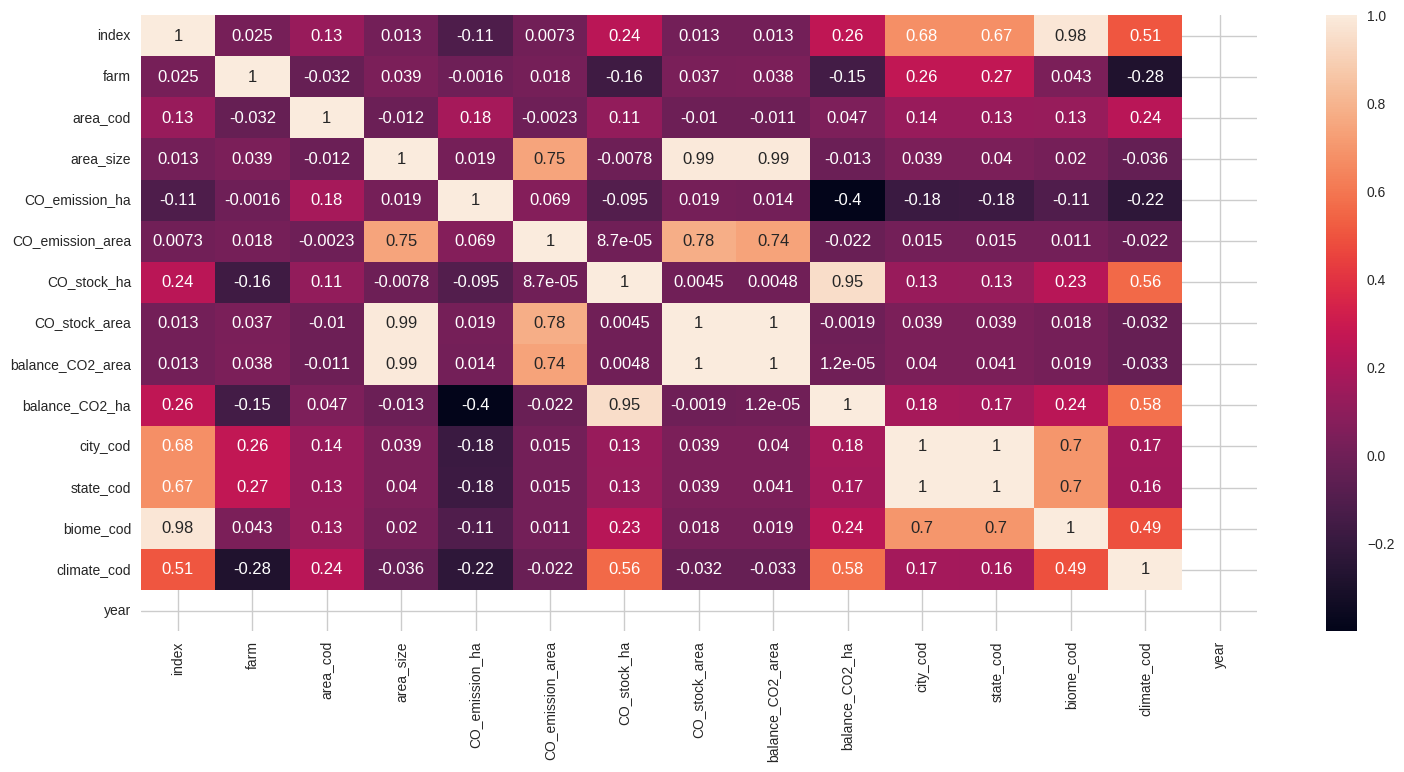

In [4]:
# Correlation
all_areas_df_corr = all_areas_df.select_dtypes(include=['int64','float64'])
figura = plt.figure(figsize=(18,8))
sns.heatmap(all_areas_df_corr.corr(), annot=True)

In [5]:
all_areas_df.count()

index               295854
farm                295854
area_cod            295854
area_name           295854
area_size           295854
CO_emission_ha      295854
CO_emission_area    295854
CO_stock_ha         295854
CO_stock_area       295854
balance_CO2_area    295854
balance_CO2_ha      295854
city_cod            295854
city_name           295854
state_cod           295854
state_name          295854
biome_cod           295854
biome               295854
climate_cod         295854
climate             295854
year                295854
dtype: int64

#**Linear Regression - Simple**

In [ ]:
# X is the attribute: area_cod (predictor attribute) => (area_cod: 2, climate_cod: 17)
X_areas = all_areas_df.iloc[:, 17].values
X_areas

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas = all_areas_df.iloc[:, 10].values
Y_areas

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

In [ ]:
X_areas.shape, Y_areas.shape

((295854,), (295854,))

In [ ]:
# Correlation coefficient
np.corrcoef(X_areas, Y_areas)

array([[1.        , 0.58368123],
       [0.58368123, 1.        ]])

In [ ]:
# Transforming array into matrix (required for sklearn)
X_areas = X_areas.reshape(-1,1)
X_areas

array([[2],
       [2],
       [2],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
X_areas.shape

(295854, 1)

**Standardization, if necessary**

In [ ]:
scaler_areas_x = StandardScaler()
X_areas = scaler_areas_x.fit_transform((X_areas).reshape(-1,1))
scaler_areas_y = StandardScaler()
Y_areas = scaler_areas_y.fit_transform((Y_areas).reshape(-1,1))
X_areas, Y_areas

(array([[-1.20113363],
        [-1.20113363],
        [-1.20113363],
        ...,
        [-0.27637271],
        [-0.27637271],
        [-0.27637271]]),
 array([[-1.36183764],
        [-1.36183764],
        [-0.03521227],
        ...,
        [-0.63060637],
        [ 0.73175623],
        [-0.71490732]]))

**Using the entire database**

In [ ]:
# Create the regression model (for all data)
simple_linear_regressor = LinearRegression()
simple_linear_regressor.fit(X_areas, Y_areas)

LinearRegression()

In [ ]:
# b0 : beginning of the regression line and b1: slope of the line
simple_linear_regressor.intercept_, simple_linear_regressor.coef_

(41.02476099770661, array([0.03405487]))

In [ ]:
# Prevision
prevision_simple_linear_regressor = simple_linear_regressor.predict(X_areas)
prevision_simple_linear_regressor

array([41.53558399, 41.53558399, 41.1269256 , ..., 41.73991318,
       42.35290077, 42.42101051])

In [ ]:
# Convert matrix to array (for the graph)
X_areas.ravel()

array([15, 15,  3, ..., 21, 39, 41])

In [ ]:
# Prediction with a value  (area 15) = estimated value of carbon/ha
simple_linear_regressor.intercept_ + simple_linear_regressor.coef_ * 15

array([41.53558399])

In [ ]:
# OR using matrix format
simple_linear_regressor.predict([[15]])

array([41.53558399])

In [ ]:
# score: algorithm quality metric (closest to 1 best value)
simple_linear_regressor.score(X_areas, Y_areas)

0.0022294312598276633

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas, prevision_simple_linear_regressor)

7.189110861488058

In [ ]:
# Mean squared error
mean_squared_error(Y_areas, prevision_simple_linear_regressor)

0.6593162183551468

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas, prevision_simple_linear_regressor))

0.8119828928956242

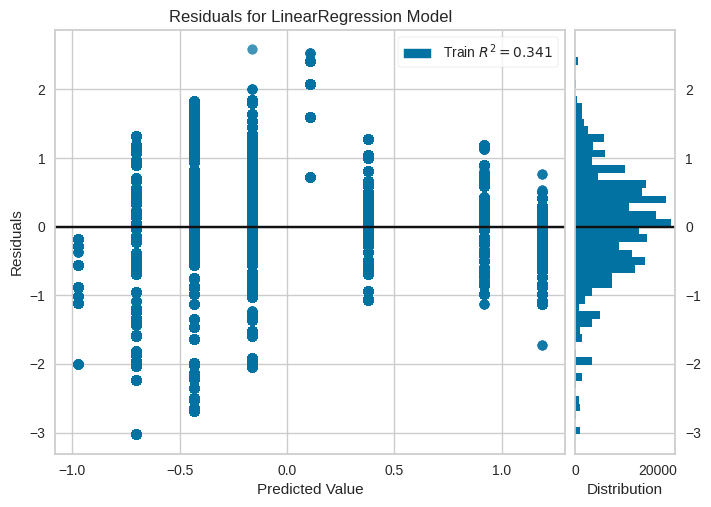

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# distance from the original values to the linear regression line (Train R2 = algorithm quality)
viewer = ResidualsPlot(simple_linear_regressor)
viewer.fit(X_areas, Y_areas)
viewer.poof()

<Axes: >

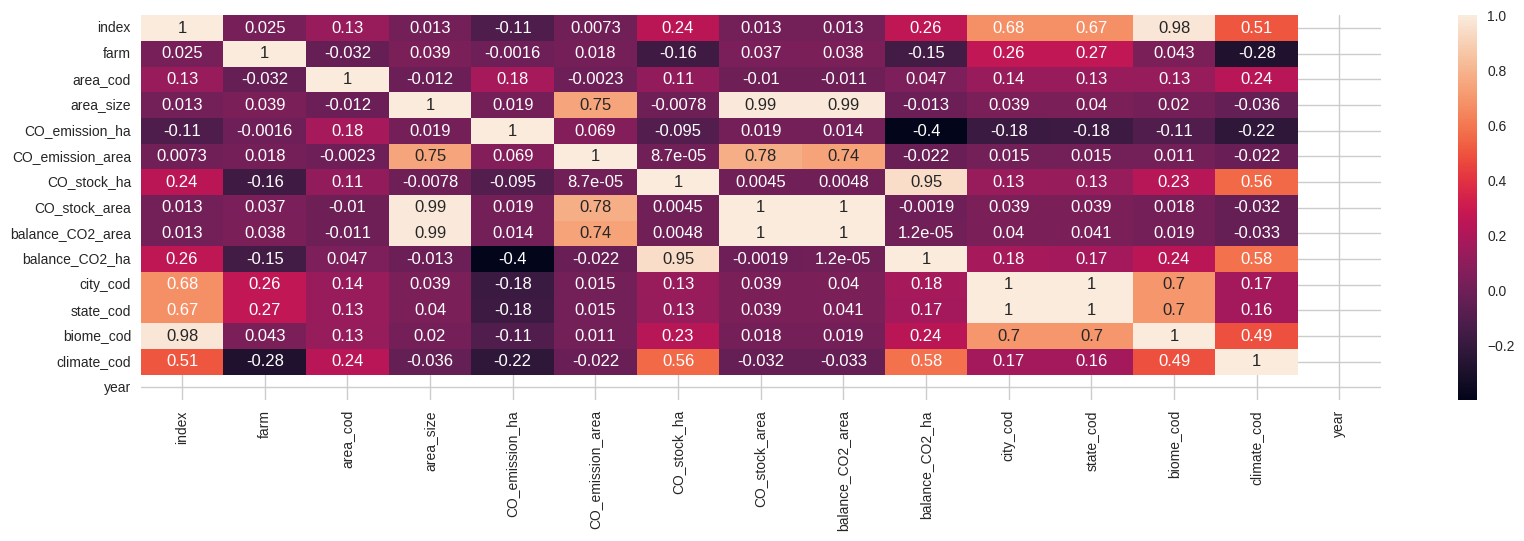

In [ ]:
# Correlation viewer
figure = plt.figure(figsize=(20,5))
sns.heatmap(all_areas_df_corr.corr(), annot=True)

**Simple Linear Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_trein, X_areas_test, Y_areas_trein, Y_areas_test = train_test_split(X_areas, Y_areas, test_size = 0.25, random_state = 0)

In [ ]:
X_areas_trein.shape, Y_areas_trein.shape, X_areas_test.shape, Y_areas_test.shape

((221890, 1), (221890,), (73964, 1), (73964,))


**Standardization, if necessary**

In [ ]:
scaler_areas_x = StandardScaler()
X_areas_trein = scaler_areas_x.fit_transform((X_areas_trein).reshape(-1,1))
X_areas_test = scaler_areas_x.fit_transform((X_areas_test).reshape(-1,1))

scaler_areas_y = StandardScaler()
Y_areas_trein = scaler_areas_y.fit_transform((Y_areas_trein).reshape(-1,1))
Y_areas_test = scaler_areas_y.fit_transform((Y_areas_test).reshape(-1,1))

X_areas_trein, Y_areas_trein, X_areas_test, Y_areas_test


(array([[ 2.03518839],
        [ 0.64786545],
        [-0.27701651],
        ...,
        [-0.27701651],
        [ 1.57274741],
        [-0.27701651]]),
 array([[1.37988252],
        [0.09106802],
        [1.19865699],
        ...,
        [0.2936487 ],
        [0.87511653],
        [0.72593471]]),
 array([[ 0.64995711],
        [-0.274443  ],
        [ 2.03655729],
        ...,
        [-0.274443  ],
        [ 1.57435723],
        [-0.274443  ]]),
 array([[0.09316035],
        [0.14404696],
        [1.36145186],
        ...,
        [1.3654358 ],
        [0.88713245],
        [0.80859292]]))

**Regression Model for training**

In [ ]:
# Convert array to matrix
X_areas_trein = X_areas_trein.reshape(-1,1)
X_areas_trein

array([[9],
       [6],
       [4],
       ...,
       [4],
       [8],
       [4]])

In [ ]:
# Create the regression model (trein)
simple_linear_regressor_trein = LinearRegression()
simple_linear_regressor_trein.fit(X_areas_trein, Y_areas_trein)

LinearRegression()

In [ ]:
# score: algorithm quality metric (trein)
simple_linear_regressor_trein.score(X_areas_trein, Y_areas_trein)

0.3417059395632749

In [ ]:
# Prevision (trein)
prevision_simple_linear_regressor_trein = simple_linear_regressor_trein.predict(X_areas_trein)
prevision_simple_linear_regressor_trein

array([52.16438545, 44.93255589, 40.11133619, ..., 40.11133619,
       49.7537756 , 40.11133619])

In [ ]:
# Real data
Y_areas_trein

array([53.86050362, 42.36746769, 52.24442042, ..., 44.17398605,
       49.35924018, 48.0289075 ])

In [ ]:
# Mean absolute error
abs(Y_areas_trein-prevision_simple_linear_regressor_trein).mean()

5.524774056298941

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_trein, prevision_simple_linear_regressor_trein)

0.619541169767389

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_trein, prevision_simple_linear_regressor_trein)

0.6582940604367249

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_trein, prevision_simple_linear_regressor_trein))

0.8113532279079962

In [ ]:
# Prediction with a value  (area 15) = estimated value of carbon/ha
simple_linear_regressor_trein.intercept_ + simple_linear_regressor_trein.coef_ * 15

array([[8.76834285]])

**Regression Model for testing**

In [ ]:
# Convert array to matrix
X_areas_test = X_areas_test.reshape(-1,1)
X_areas_test

array([[6],
       [4],
       [9],
       ...,
       [4],
       [8],
       [4]])

In [ ]:
# Create the regression model (test)
simple_linear_regressor_test = LinearRegression()
simple_linear_regressor_test.fit(X_areas_test, Y_areas_test)

LinearRegression()

In [ ]:
# score: algorithm quality metric (test)
simple_linear_regressor_test.score(X_areas_test, Y_areas_test)

0.3376363695882697

In [ ]:
# Prevision (test)
prevision_simple_linear_regressor_test = simple_linear_regressor_test.predict(X_areas_test)
prevision_simple_linear_regressor_test

array([44.91197421, 40.10805846, 52.11784785, ..., 40.10805846,
       49.71588997, 40.10805846])

In [ ]:
# Real data
Y_areas_test

array([42.36746769, 42.82257552, 53.71051817, ..., 53.74614883,
       49.46841065, 48.76598704])

In [ ]:
# Mean absolute error
abs(Y_areas_test-prevision_simple_linear_regressor_test).mean()

5.556609747756844

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_test, prevision_simple_linear_regressor_test)

0.6212967986959026

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_test, prevision_simple_linear_regressor_test)

0.6623636304117302

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_test, prevision_simple_linear_regressor_test))

0.8138572543214997

In [ ]:
# Prediction with a value  (area 15) = estimated value of carbon/ha
simple_linear_regressor_trein.intercept_ + simple_linear_regressor_trein.coef_ * 15

array([[8.76834285]])

# **Linear Regression - Multiple**

In [ ]:
# X composed of attributes: area_cod, city_cod, climate_cod
X_areas_mult = all_areas_df.iloc[:, [2,11,17]].values
X_areas_mult

array([[     15, 1100015,       2],
       [     15, 1100015,       2],
       [      3, 1100015,       2],
       ...,
       [     21, 5107602,       4],
       [     39, 5107602,       4],
       [     41, 5107602,       4]])

In [ ]:
# # Y is the attribute: balance_CO2_ha
Y_areas_mult = all_areas_df.iloc[:, 10].values
Y_areas_mult

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

**Using the entire database**

**Standardization, if necessary**

In [ ]:
scaler_areas_x = StandardScaler()
X_areas_mult = scaler_areas_x.fit_transform((X_areas_mult))
scaler_areas_y = StandardScaler()
Y_areas_mult = scaler_areas_y.fit_transform((Y_areas_mult).reshape(-1,1))
X_areas_mult, Y_areas_mult

(array([[-0.0344385 , -1.83221148, -1.20113363],
        [-0.0344385 , -1.83221148, -1.20113363],
        [-1.00428164, -1.83221148, -1.20113363],
        ...,
        [ 0.45048307,  0.99010701, -0.27637271],
        [ 1.90524778,  0.99010701, -0.27637271],
        [ 2.06688831,  0.99010701, -0.27637271]]),
 array([[-1.36183764],
        [-1.36183764],
        [-0.03521227],
        ...,
        [-0.63060637],
        [ 0.73175623],
        [-0.71490732]]))

In [ ]:
# Create the regression model (for all data)
mult_linear_regressor = LinearRegression()
mult_linear_regressor.fit(X_areas_mult, Y_areas_mult)

LinearRegression()

In [ ]:
# Prevision
prevision_mult_linear_regressor = mult_linear_regressor.predict(X_areas_mult)
prevision_mult_linear_regressor

array([33.74682705, 33.74682705, 34.65890999, ..., 40.46273702,
       39.0946126 , 38.94259878])

In [ ]:
# score: algorithm quality metric (closest to 1 best value)
mult_linear_regressor.score(X_areas_mult, Y_areas_mult)

0.35729389513345233

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_mult, prevision_mult_linear_regressor)

5.378550101555062

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_mult, prevision_mult_linear_regressor)

51.1842313587086

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_mult, prevision_mult_linear_regressor))

7.154315575840124

**Multiple Linear Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_mult_trein, X_areas_mult_test, Y_areas_mult_trein, Y_areas_mult_test = train_test_split(X_areas_mult, Y_areas_mult, test_size = 0.25, random_state = 0)

In [ ]:
X_areas_mult_trein.shape, Y_areas_mult_trein.shape, X_areas_mult_test.shape, Y_areas_mult_test.shape

((221890, 3), (221890,), (73964, 3), (73964,))

**Standardization, if necessary**


In [ ]:
scaler_areas_x_mult = StandardScaler()
X_areas_mult_trein = scaler_areas_x_mult.fit_transform((X_areas_mult_trein))
X_areas_mult_test = scaler_areas_x_mult.fit_transform((X_areas_mult_test))

scaler_areas_y_mult = StandardScaler()
Y_areas_mult_trein = scaler_areas_y_mult.fit_transform((Y_areas_mult_trein))
Y_areas_mult_test = scaler_areas_y_mult.fit_transform((Y_areas_mult_test))

X_areas_mult_trein, Y_areas_mult_trein, X_areas_mult_test, Y_areas_mult_test

ValueError: Expected 2D array, got 1D array instead:
array=[53.86050362 42.36746769 52.24442042 ... 44.17398605 49.35924018
 48.0289075 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Regression Model for training**

In [ ]:
# Create the regression model (trein)
mult_linear_regressor_trein = LinearRegression()
mult_linear_regressor_trein.fit(X_areas_mult_trein, Y_areas_mult_trein)

LinearRegression()

In [ ]:
# score: algorithm quality metric (trein)
mult_linear_regressor_trein.score(X_areas_mult_trein, Y_areas_mult_trein)

0.3582179463256121

In [ ]:
# Prevision (trein)
prevision_mult_linear_regressor_trein = mult_linear_regressor_trein.predict(X_areas_mult_trein)
prevision_mult_linear_regressor_trein

array([51.5796455 , 45.59183355, 39.16810138, ..., 41.20005707,
       50.4765598 , 41.80338334])

In [ ]:
# Real data
Y_areas_mult_trein

array([53.86050362, 42.36746769, 52.24442042, ..., 44.17398605,
       49.35924018, 48.0289075 ])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_mult_trein, prevision_mult_linear_regressor_trein)

5.37032497078759

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_mult_trein, prevision_mult_linear_regressor_trein)

51.03595772522125

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_mult_trein, prevision_mult_linear_regressor_trein))

7.143945529273109

**Regression Model for testing**

In [ ]:
# Create the regression model (test)
mult_linear_regressor_test = LinearRegression()
mult_linear_regressor_test.fit(X_areas_mult_test, Y_areas_mult_test)

LinearRegression()

In [ ]:
# score: algorithm quality metric (test)
mult_linear_regressor_test.score(X_areas_mult_test, Y_areas_mult_test)

0.35454709085918457

In [ ]:
# Prevision (test)
prevision_mult_linear_regressor_test = mult_linear_regressor_test.predict(X_areas_mult_test)
prevision_mult_linear_regressor_test

array([45.59168066, 40.58558825, 52.0132839 , ..., 39.10778435,
       50.5037911 , 41.77177909])

In [ ]:
# Real data
Y_areas_mult_test

array([42.36746769, 42.82257552, 53.71051817, ..., 53.74614883,
       49.46841065, 48.76598704])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_mult_test, prevision_mult_linear_regressor_test)

5.403141384161905

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_mult_test, prevision_mult_linear_regressor_test)

51.62809775999066

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_mult_test, prevision_mult_linear_regressor_test))

7.185269498076649

# **Polynomial Regression**

In [ ]:
# X is the attribute: area_cod (predictor attribute) => (area_cod: 2, climate_cod: 17)
X_areas = all_areas_df.iloc[:, 17].values
X_areas

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas = all_areas_df.iloc[:, 10].values
Y_areas

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

In [ ]:
scaler_polynomial_x = StandardScaler()
X_areas  = scaler_polynomial_x.fit_transform(X_areas.reshape(-1,1))
X_areas

array([[-1.20113363],
       [-1.20113363],
       [-1.20113363],
       ...,
       [-0.27637271],
       [-0.27637271],
       [-0.27637271]])

In [ ]:
scaler_polynomial_y = StandardScaler()
Y_areas  = scaler_polynomial_y.fit_transform(Y_areas.reshape(-1,1))
Y_areas

array([[-1.36183764],
       [-1.36183764],
       [-0.03521227],
       ...,
       [-0.63060637],
       [ 0.73175623],
       [-0.71490732]])

In [ ]:
# Apply degree to the polynomial
polynomial_degree = PolynomialFeatures(degree=8)

**Using the entire database**

In [ ]:
# Transforming array into matrix (required for sklearn)
X_areas = X_areas.reshape(-1,1)
X_areas

array([[2],
       [2],
       [2],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
# Apply polynominal degree in X
X_areas_poly = polynomial_degree.fit_transform(X_areas)

In [ ]:
X_areas_poly.shape

(295854, 9)

In [ ]:
X_areas_poly

array([[1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 6.4000e+01, 1.2800e+02,
        2.5600e+02],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 6.4000e+01, 1.2800e+02,
        2.5600e+02],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 6.4000e+01, 1.2800e+02,
        2.5600e+02],
       ...,
       [1.0000e+00, 4.0000e+00, 1.6000e+01, ..., 4.0960e+03, 1.6384e+04,
        6.5536e+04],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, ..., 4.0960e+03, 1.6384e+04,
        6.5536e+04],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, ..., 4.0960e+03, 1.6384e+04,
        6.5536e+04]])

In [ ]:
# Create the regression model (for all data)
poly_simple_linear_regressor = LinearRegression()
poly_simple_linear_regressor.fit(X_areas_poly, Y_areas)

LinearRegression()

In [ ]:
# Score: algorithm quality metric (closest to 1 best value)
poly_simple_linear_regressor.score(X_areas_poly, Y_areas)

0.39188562334114374

In [ ]:
# Prevision
prevision_poly_simple_linear_regressor = poly_simple_linear_regressor.predict(X_areas_poly)
prevision_poly_simple_linear_regressor

array([35.93034777, 35.93034777, 35.93034777, ..., 40.85079572,
       40.85079572, 40.85079572])

In [ ]:
# Real data
Y_areas

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas, prevision_poly_simple_linear_regressor)

5.185715142603776

In [ ]:
# Mean squared error
mean_squared_error(Y_areas, prevision_poly_simple_linear_regressor)

48.42939364007874

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas, prevision_poly_simple_linear_regressor))

6.959123051080412

In [ ]:
# Prevision
new_value = [[15]]
new_value = polynomial_degree.transform(new_value)
new_value

array([[1.00000000e+00, 1.50000000e+01, 2.25000000e+02, 3.37500000e+03,
        5.06250000e+04, 7.59375000e+05, 1.13906250e+07, 1.70859375e+08,
        2.56289062e+09]])

In [ ]:
poly_simple_linear_regressor.predict(new_value)

array([1695809.42789291])

**Polynomial Linear Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_trein, X_areas_test, Y_areas_trein, Y_areas_test = train_test_split(X_areas, Y_areas, test_size = 0.25, random_state = 0)

**Regression Model for training**

In [ ]:
X_areas_trein.shape, Y_areas_trein.shape

((221890, 1), (221890,))

In [ ]:
# Transforming array into matrix (required for sklearn)
X_areas_trein = X_areas_trein.reshape(-1,1)
X_areas_trein

array([[9],
       [6],
       [4],
       ...,
       [4],
       [8],
       [4]])

In [ ]:
# Apply polynominal degree in X
X_areas_trein_poly = polynomial_degree.fit_transform(X_areas_trein)
X_areas_trein_poly.shape

(221890, 9)

In [ ]:
# Create the regression model
poly_simple_linear_regressor_trein = LinearRegression()
poly_simple_linear_regressor_trein.fit(X_areas_trein_poly, Y_areas_trein)

LinearRegression()

In [ ]:
# Score: algorithm quality metric (closest to 1 best value)
poly_simple_linear_regressor_trein.score(X_areas_trein_poly, Y_areas_trein)

0.3926427816324467

In [ ]:
# Prevision
prevision_poly_simple_linear_regressor_trein = poly_simple_linear_regressor_trein.predict(X_areas_trein_poly)
prevision_poly_simple_linear_regressor_trein

array([55.18545912, 43.20164474, 40.85317434, ..., 40.85317434,
       47.55414104, 40.85317434])

In [ ]:
# Real data
Y_areas_trein

array([53.86050362, 42.36746769, 52.24442042, ..., 44.17398605,
       49.35924018, 48.0289075 ])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_trein, prevision_poly_simple_linear_regressor_trein)

5.179652218533132

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_trein, prevision_poly_simple_linear_regressor_trein)

48.29841710787534

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_trein, prevision_poly_simple_linear_regressor_trein))

6.949706260546221

**Regression Model for testing**

In [ ]:
X_areas_test.shape, Y_areas_test.shape

((73964, 1), (73964,))

In [ ]:
# Transforming array into matrix (required for sklearn)
X_areas_test = X_areas_test.reshape(-1,1)
X_areas_test

array([[6],
       [4],
       [9],
       ...,
       [4],
       [8],
       [4]])

In [ ]:
# Apply polynominal degree in X
X_areas_test_poly = polynomial_degree.fit_transform(X_areas_test)
X_areas_test_poly.shape

(73964, 9)

In [ ]:
# Create the regression model
poly_simple_linear_regressor_test = LinearRegression()
poly_simple_linear_regressor_test.fit(X_areas_test_poly, Y_areas_test)

LinearRegression()

In [ ]:
# Score: algorithm quality metric (closest to 1 best value)
poly_simple_linear_regressor_test.score(X_areas_test_poly, Y_areas_test)

0.3896462259610456

In [ ]:
# Prevision
prevision_poly_simple_linear_regressor_test = poly_simple_linear_regressor_test.predict(X_areas_test_poly)
prevision_poly_simple_linear_regressor_test

array([43.1488124 , 40.84363245, 55.21026559, ..., 40.84363245,
       47.4951952 , 40.84363245])

In [ ]:
# Real data
Y_areas_test

array([42.36746769, 42.82257552, 53.71051817, ..., 53.74614883,
       49.46841065, 48.76598704])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_test, prevision_poly_simple_linear_regressor_test)

5.203545221247907

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_test, prevision_poly_simple_linear_regressor_test)

48.82060932409198

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_test, prevision_poly_simple_linear_regressor_test))

6.987174631000143

# **Polynomial Regression - Multiple**

In [ ]:
# X composed of attributes: area_cod, city_cod, climate_cod
X_areas_mult = all_areas_df.iloc[:, [2,11,17]].values
X_areas_mult

array([[     15, 1100015,       2],
       [     15, 1100015,       2],
       [      3, 1100015,       2],
       ...,
       [     21, 5107602,       4],
       [     39, 5107602,       4],
       [     41, 5107602,       4]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_mult = all_areas_df.iloc[:, [10]].values
Y_areas_mult

array([[29.39699123],
       [29.39699123],
       [41.23585922],
       ...,
       [35.92253386],
       [48.08032261],
       [35.17022823]])

**Standardization, in this algorithm is very important**

In [ ]:
scaler_mult_polynomial_x = StandardScaler()
X_areas_mult  = scaler_mult_polynomial_x.fit_transform(X_areas_mult)
X_areas_mult

array([[-0.0344385 , -1.83221148, -1.20113363],
       [-0.0344385 , -1.83221148, -1.20113363],
       [-1.00428164, -1.83221148, -1.20113363],
       ...,
       [ 0.45048307,  0.99010701, -0.27637271],
       [ 1.90524778,  0.99010701, -0.27637271],
       [ 2.06688831,  0.99010701, -0.27637271]])

In [ ]:
scaler_mult_polynomial_y = StandardScaler()
Y_areas_mult  = scaler_mult_polynomial_y.fit_transform(Y_areas_mult)
Y_areas_mult

array([[-1.36183764],
       [-1.36183764],
       [-0.03521227],
       ...,
       [-0.63060637],
       [ 0.73175623],
       [-0.71490732]])

In [ ]:
X_areas_mult.shape, Y_areas_mult.shape

((295854, 3), (295854, 1))

In [ ]:
# Apply degree to the polynomial
mult_polynomial_degree = PolynomialFeatures(degree=5)

**Using the entire database**

In [ ]:
# Apply polynominal degree in X
X_areas_mult_poly = mult_polynomial_degree.fit_transform(X_areas_mult)

In [ ]:
X_areas_mult_poly.shape

(295854, 56)

In [ ]:
# Create the regression model (for all data)
mult_poly_simple_linear_regressor = LinearRegression()
mult_poly_simple_linear_regressor.fit(X_areas_mult_poly, Y_areas_mult)

LinearRegression()

In [ ]:
# Score: algorithm quality metric (closest to 1 best value)
mult_poly_simple_linear_regressor.score(X_areas_mult_poly, Y_areas_mult)

0.6693248965086518

In [ ]:
# Prevision
prevision_mult_poly_simple_linear_regressor = mult_poly_simple_linear_regressor.predict(X_areas_mult_poly)
prevision_mult_poly_simple_linear_regressor

array([[-1.18189048],
       [-1.18189048],
       [-0.34412739],
       ...,
       [-0.74410743],
       [ 0.58499236],
       [-0.06575241]])

In [ ]:
# Real data
Y_areas_mult

array([[-1.36183764],
       [-1.36183764],
       [-0.03521227],
       ...,
       [-0.63060637],
       [ 0.73175623],
       [-0.71490732]])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_mult, prevision_mult_poly_simple_linear_regressor)

0.41763113300878113

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_mult, prevision_mult_poly_simple_linear_regressor)

0.33067510349134815

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_mult, prevision_mult_poly_simple_linear_regressor))

0.5750435666028689

**Cross Validation**

In [ ]:
# Apply degree to the polynomial
mult_polynomial_degree = PolynomialFeatures(degree=15)

In [ ]:
# Apply polynominal degree in X
X_areas_mult_poly = mult_polynomial_degree.fit_transform(X_areas_mult)

In [ ]:
# Cross Validation Polynomial Regression (Multiple)
results_polynomial = []
for i in range(60):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  mult_polynomial_degree = PolynomialFeatures(degree=4)
  X_areas_mult_poly = mult_polynomial_degree.fit_transform(X_areas_mult)
  poly = LinearRegression()
  scores = cross_val_score(poly, X_areas_mult_poly, Y_areas_mult, cv=kfold)
  results_polynomial.append(scores.mean())

results_polynomial

[0.6257680980018403,
 0.6257550355253957,
 0.6257719210497562,
 0.6257732316294325,
 0.6257572916439773,
 0.6257269552440725,
 0.6257611145519412,
 0.6257527061769457,
 0.6257584414670928,
 0.6257411423742931,
 0.6257494484793273,
 0.6257483192765368,
 0.6257597291802607,
 0.6257388576074598,
 0.6257304241842896,
 0.6257473859040745,
 0.625751750798746,
 0.6257470680461984,
 0.6257482500731415,
 0.6257709794237276,
 0.6257598655134503,
 0.625704014618967,
 0.6257653468528455,
 0.6257583707772825,
 0.6257579416551998,
 0.6257412351211794,
 0.62575973307428,
 0.6257394270230567,
 0.6257541430109067,
 0.6257285758330255,
 0.625744249418917,
 0.6257437320656501,
 0.6257454863414269,
 0.6257538440328172,
 0.6257452753718452,
 0.6257487037545,
 0.6257480952581578,
 0.6257661498548667,
 0.6257598229302106,
 0.6257257065064434,
 0.6257043572592745,
 0.6257441829438615,
 0.625743208544801,
 0.6257769421907858,
 0.625792337096735,
 0.6257706465532422,
 0.6257526055511787,
 0.6257651997459129,
 0

**Multiple Linear Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_mult_trein, X_areas_mult_test, Y_areas_mult_trein, Y_areas_mult_test = train_test_split(X_areas_mult, Y_areas_mult, test_size = 0.25, random_state = 0)

In [ ]:
X_areas_mult_trein.shape, Y_areas_mult_trein.shape, X_areas_mult_test.shape, Y_areas_mult_test.shape

((221890, 3), (221890, 1), (73964, 3), (73964, 1))

In [ ]:
# Apply degree to the polynomial
mult_polynomial_degree = PolynomialFeatures(degree=15)

**Regression Model for training**

In [ ]:
# Apply polynominal degree in X
X_areas_multi_poly_trein = mult_polynomial_degree.fit_transform(X_areas_mult_trein)

In [ ]:
# Cross Validation Polynomial Regression (Multiple)
results_polynomial = []
for i in range(60):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  mult_polynomial_degree = PolynomialFeatures(degree=4)
  X_areas_multi_poly_trein = mult_polynomial_degree.fit_transform(X_areas_mult_trein)
  poly = LinearRegression()
  scores = cross_val_score(poly, X_areas_multi_poly_trein, Y_areas_mult_trein, cv=kfold)
  results_polynomial.append(scores.mean())

results_polynomial

[0.6265713273817718,
 0.6265665923950855,
 0.6265817936971588,
 0.6265786898565286,
 0.626621698737488,
 0.6265949909316341,
 0.626599894556442,
 0.626598019822872,
 0.626602543484182,
 0.6266446683849491,
 0.6266176632781763,
 0.6265890657342212,
 0.6266057532335378,
 0.6266118436677071,
 0.6265997034202824,
 0.62656728445386,
 0.6265976760938472,
 0.6265475264359136,
 0.6266122102911368,
 0.6266073777434088,
 0.6266013266071788,
 0.6265843712539847,
 0.626562679449961,
 0.6265785093695323,
 0.6265967921824315,
 0.6266114974365621,
 0.626586452159697,
 0.6266035233999807,
 0.6266026073129771,
 0.6265848681297246,
 0.6266424272148612,
 0.626571220957955,
 0.6265267038220391,
 0.6265895018697687,
 0.6266114881136898,
 0.6265847895807646,
 0.6265851114662081,
 0.6265751782793704,
 0.6266180373910211,
 0.6266038985496293,
 0.6266003489750105,
 0.6266013902923235,
 0.6266011611414986,
 0.6265902253098784,
 0.626574191602332,
 0.6265911658013982,
 0.6266317919515088,
 0.6265914927505823,
 0

In [ ]:
# Create the regression model (for trein data)
poly_mult_linear_regressor = LinearRegression()
poly_mult_linear_regressor.fit(X_areas_multi_poly_trein, Y_areas_mult_trein)

LinearRegression()

In [ ]:
# Score: algorithm quality metric (closest to 1 best value)
poly_mult_linear_regressor.score(X_areas_multi_poly_trein , Y_areas_mult_trein)

0.8200105165986193

In [ ]:
# Prevision
prevision_poly_mult_linear_regressor_trein = poly_mult_linear_regressor.predict(X_areas_multi_poly_trein)
prevision_poly_mult_linear_regressor_trein

array([[1.44554459],
       [0.31866961],
       [1.27942215],
       ...,
       [0.2846605 ],
       [0.82701908],
       [0.66238436]])

In [ ]:
# Real data
Y_areas_mult_trein

array([[1.37946467],
       [0.09159213],
       [1.1983716 ],
       ...,
       [0.29402475],
       [0.8750676 ],
       [0.72599482]])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_mult_trein, prevision_poly_mult_linear_regressor_trein)

0.2788241203274454

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_mult_trein, prevision_poly_mult_linear_regressor_trein)

0.17972648066610986

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_mult_trein, prevision_poly_mult_linear_regressor_trein))

0.42394160053727903


**Regression Model for testing**

**Cross Validation**

In [ ]:
# Apply degree to the polynomial
mult_polynomial_degree = PolynomialFeatures(degree=15)

In [ ]:
# Apply polynominal degree in X
X_areas_multi_poly_test = mult_polynomial_degree.fit_transform(X_areas_mult_test)

In [ ]:
# Cross Validation Polynomial Regression (Multiple)
results_polynomial = []
for i in range(60):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  mult_polynomial_degree = PolynomialFeatures(degree=4)
  X_areas_multi_poly_test = mult_polynomial_degree.fit_transform(X_areas_mult_test)
  poly = LinearRegression()
  scores = cross_val_score(poly, X_areas_multi_poly_test, Y_areas_mult_test, cv=kfold)
  results_polynomial.append(scores.mean())

results_polynomial

[0.7338196677086717,
 0.7428642976084683,
 0.7417511948314903,
 0.7052432924994502,
 0.7334863127058668,
 0.7259809582746484,
 0.7366941603580577,
 0.7258727629847074,
 0.7389649004423748,
 0.7426977210414936,
 0.7301629382609425,
 0.7282127206237942,
 0.7342864923341794,
 0.7297155031604137,
 0.7371425043857498,
 0.7340751050418686,
 0.7431836461348234,
 0.7226213234888214,
 0.7336561215397704,
 0.7228464551357158,
 0.739899074958059,
 0.7702663994392587,
 0.7447954452244978,
 0.728916949930098,
 0.7312298604293261,
 0.7254575224926549,
 0.7401372896445682,
 0.7383984257699538,
 0.7244599116465924,
 0.7283638261500773,
 0.7417585094251582,
 0.7512741692604132,
 0.741362782701308,
 0.731862129239926,
 0.734539474190931,
 0.7315902387682891,
 0.7324257674096583,
 0.7346662547438559,
 0.7325969434544113,
 0.722475931970211,
 0.7344770114273911,
 0.7250306274667273,
 0.722791149601559,
 0.7315841888288437,
 0.7366741137384033,
 0.7251357371546099,
 0.6829822192394219,
 0.7369627612365284,

In [ ]:
# Create the regression model (for test data)
poly_mult_linear_regressor = LinearRegression()
poly_mult_linear_regressor.fit(X_areas_multi_poly_test, Y_areas_mult_test)

LinearRegression()

In [ ]:
# Score: algorithm quality metric (closest to 1 best value)
poly_mult_linear_regressor.score(X_areas_multi_poly_test , Y_areas_mult_test)

0.8176173307546184

In [ ]:
# Prevision
prevision_poly_mult_linear_regressor_test = poly_mult_linear_regressor.predict(X_areas_multi_poly_test)
prevision_poly_mult_linear_regressor_test

array([[0.32280238],
       [0.38180604],
       [1.46281236],
       ...,
       [1.29546159],
       [0.90295308],
       [0.30616873]])

In [ ]:
# Real Data
Y_areas_mult_test

array([[0.09159213],
       [0.14259004],
       [1.36265778],
       ...,
       [1.36665044],
       [0.8873009 ],
       [0.80858957]])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_mult_test, prevision_poly_mult_linear_regressor_test)

0.2872461689838828

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_mult_test, prevision_poly_mult_linear_regressor_test)

0.18318139753156293

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_mult_test, prevision_poly_mult_linear_regressor_test))

0.42799695972233603

# **Decision Tree Regression**

In [ ]:
# X is the attribute: area_cod (predictor attribute) => (area_cod: 2, city_cod: 11, climate_cod: 17)
X_areas_tree = all_areas_df.iloc[:, [2]].values
X_areas_tree

array([[15],
       [15],
       [ 3],
       ...,
       [21],
       [39],
       [41]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_tree  = all_areas_df.iloc[:, 10].values
Y_areas_tree

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

**standardization**

In [ ]:
scaler_areas_tree = StandardScaler()
X_areas_tree  = scaler_areas_tree.fit_transform(X_areas_tree)
X_areas_tree

array([[-1.20113363],
       [-1.20113363],
       [-1.20113363],
       ...,
       [-0.27637271],
       [-0.27637271],
       [-0.27637271]])

In [ ]:
X_areas_tree.shape

(295854, 1)

**Using the entire database**

In [ ]:
regressor_areas_tree = DecisionTreeRegressor()
regressor_areas_tree.fit(X_areas_tree, Y_areas_tree)

DecisionTreeRegressor()

In [ ]:
# Prevision
prevision_areas_tree = regressor_areas_tree.predict(X_areas_tree)
prevision_areas_tree[:10]

array([35.19257552, 35.19257552, 46.55295169, 35.19257552, 35.19257552,
       46.55295169, 35.19257552, 46.55295169, 38.61829037, 41.52805781])

In [ ]:
Y_areas_tree[:10]

array([29.39699123, 29.39699123, 41.23585922, 29.39699123, 29.39699123,
       41.23585922, 29.39699123, 41.23585922, 38.92169961, 62.31841506])

In [ ]:
# Score
regressor_areas_tree.score(X_areas_tree,Y_areas_tree)

0.2683799024295205

In [ ]:
max_min_areas_tree = np.arange(np.min(X_areas_tree), np.max(X_areas_tree), 1)
max_min_areas_tree

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [ ]:
max_min_areas_tree.shape

(45,)

In [ ]:
# Array to matrix
max_min_areas_tree = max_min_areas_tree.reshape(-1,1)
max_min_areas_tree.shape

(45, 1)

In [ ]:
# Predict new value
regressor_areas_tree.predict([[9]])

array([46.62010508])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_tree, prevision_areas_tree)

5.998323833165989

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_tree, prevision_areas_tree)

58.265219603762766

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_tree, prevision_areas_tree))

7.633165765510583

**Decision Tree Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_tree_trein, X_areas_tree_test, Y_areas_tree_trein, Y_areas_tree_test = train_test_split(X_areas_tree, Y_areas_tree, test_size = 0.25, random_state = 0)
X_areas_tree_trein.shape, Y_areas_tree_trein.shape, X_areas_tree_test.shape, Y_areas_tree_test.shape

((221890, 1), (221890,), (73964, 1), (73964,))

**Decision Tree for training**

In [ ]:
regressor_areas_tree = DecisionTreeRegressor()
regressor_areas_tree.fit(X_areas_tree_trein, Y_areas_tree_trein)

DecisionTreeRegressor()

In [ ]:
# Prevision
prevision_areas_tree_trein = regressor_areas_tree.predict(X_areas_tree_trein)
prevision_areas_tree_trein[:10]

array([41.69496504, 41.53547687, 43.03778828, 35.1854979 , 35.1854979 ,
       35.1854979 , 57.34538345, 41.53547687, 35.1854979 , 38.63871971])

In [ ]:
Y_areas_tree_trein[:10]

array([53.86050362, 42.36746769, 52.24442042, 26.39401931, 45.61285427,
       35.48706784, 57.51698026, 46.41015542, 23.56864242, 39.69374816])

In [ ]:
# Score
regressor_areas_tree.score(X_areas_tree_trein,Y_areas_tree_trein)

0.2685576695214038

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_tree_trein, prevision_areas_tree_trein)

5.994996372835109

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_tree_trein, prevision_areas_tree_trein)

48.29841710787519

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_tree_trein, prevision_areas_tree_trein))

6.94970626054621


**Decision Tree for testing**

In [ ]:
regressor_areas_tree = DecisionTreeRegressor()
regressor_areas_tree.fit(X_areas_tree_test, Y_areas_tree_test)

DecisionTreeRegressor()

In [ ]:
# Prevision
prevision_areas_tree_test = regressor_areas_tree.predict(X_areas_tree_test)
prevision_areas_tree_test[:10]

array([41.50551792, 43.54101155, 35.2138521 , 46.57599586, 46.57599586,
       42.88090719, 35.2138521 , 41.60321773, 41.60321773, 42.88090719])

In [ ]:
Y_areas_tree_test[:10]

array([42.36746769, 42.82257552, 53.71051817, 34.79573761, 47.33785252,
       58.07517627, 23.56864242, 39.68946431, 41.58193107, 49.27056767])

In [ ]:
# Score
regressor_areas_tree.score(X_areas_tree_test,Y_areas_tree_test)

0.26790872068941696

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_tree_test, prevision_areas_tree_test)

6.007740822241548

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_tree_test, prevision_areas_tree_test)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_tree_test, prevision_areas_tree_test))

# Decision Tree Regression - **Multiple**

In [ ]:
# X composed of attributes: area_cod, city_cod, climate_cod (area_cod: 2, city_cod: 11, climate_cod: 17)
X_areas_tree_mult = all_areas_df.iloc[:, [2,11,17]].values
X_areas_tree_mult

array([[     15, 1100015,       2],
       [     15, 1100015,       2],
       [      3, 1100015,       2],
       ...,
       [     21, 5107602,       4],
       [     39, 5107602,       4],
       [     41, 5107602,       4]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_tree_mult  = all_areas_df.iloc[:, [10]].values
Y_areas_tree_mult

array([[29.39699123],
       [29.39699123],
       [41.23585922],
       ...,
       [35.92253386],
       [48.08032261],
       [35.17022823]])

**Standardization:**
If you use it, you have to do the conversion in the prevision

In [ ]:
scaler_areas_tree_mult = StandardScaler()
X_areas_tree_mult  = scaler_areas_tree_mult.fit_transform(X_areas_tree_mult)
X_areas_tree_mult

array([[-0.0344385 , -1.83221148, -1.20113363],
       [-0.0344385 , -1.83221148, -1.20113363],
       [-1.00428164, -1.83221148, -1.20113363],
       ...,
       [ 0.45048307,  0.99010701, -0.27637271],
       [ 1.90524778,  0.99010701, -0.27637271],
       [ 2.06688831,  0.99010701, -0.27637271]])

In [ ]:
X_areas_tree_mult.shape

(295854, 3)

In [ ]:
regressor_areas_tree_mult = DecisionTreeRegressor()
regressor_areas_tree_mult.fit(X_areas_tree_mult, Y_areas_tree_mult)

DecisionTreeRegressor()

In [ ]:
prevision_area_tree_mult = regressor_areas_tree_mult.predict(X_areas_tree_mult)
prevision_area_tree_mult[:10]

array([29.39699123, 29.39699123, 41.23585922, 29.39699123, 29.39699123,
       41.23585922, 29.39699123, 41.23585922, 38.92169961, 62.31841506])

In [ ]:
Y_areas_tree_mult[:10].ravel()

array([29.39699123, 29.39699123, 41.23585922, 29.39699123, 29.39699123,
       41.23585922, 29.39699123, 41.23585922, 38.92169961, 62.31841506])

In [ ]:
# Score
regressor_areas_tree_mult.score(X_areas_tree_mult,Y_areas_tree_mult)

1.0

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_tree_mult, prevision_area_tree_mult)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_tree_mult, prevision_area_tree_mult)

6.437026059023971e-25

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_tree_mult, prevision_area_tree_mult))

8.023107913411094e-13

In [ ]:
# Predicting a value
regressor_areas_tree_mult.predict([[46,3161403,8]])

array([53.49693611])

In [ ]:
# Cross Validation Decision Tree Regression (Multiple)
results_tree = []
for i in range(120):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  tree = DecisionTreeRegressor()
  scores = cross_val_score(tree, X_areas_tree_mult, Y_areas_tree_mult, cv=kfold)
  results_tree.append(scores.mean())

results_tree

[0.999943146521737,
 0.9999567872776005,
 0.9999570673775097,
 0.9999447390226738,
 0.9999376454084133,
 0.999942963582248,
 0.9999414348060996,
 0.9999569930634793,
 0.9999570138284503,
 0.9999530645177945,
 0.9999638593656359,
 0.9999498129770293,
 0.9999570823049837,
 0.9999568919139575,
 0.9999493336871919,
 0.9999568136593554,
 0.9999569723344848,
 0.9999532392503324,
 0.999944578356408,
 0.9999606251231302,
 0.9999501405949642,
 0.9999532163257134,
 0.9999571614194073,
 0.9999416789478579,
 0.999941612772157,
 0.9999551958116679,
 0.9999496247625833,
 0.9999566901024277,
 0.9999548086058194,
 0.9999588800396724,
 0.9999567432581535,
 0.9999552588619194,
 0.999957037945288,
 0.9999494450804705,
 0.9999400499555271,
 0.9999571646851584,
 0.9999588468938274,
 0.9999569655109679,
 0.999957125477113,
 0.9999408476837008,
 0.9999584746326745,
 0.9999531786234825,
 0.9999567945582211,
 0.9999566716083967,
 0.9999572062049455,
 0.9999410163909385,
 0.9999582597007525,
 0.9999568991907546

**Multiple Decision Tree Regression - training and testing bases**

In [ ]:
# # Division of bases (75% trein, 25% test)
X_areas_tree_mult_trein, X_areas_tree_mult_test, Y_areas_tree_mult_trein, Y_areas_tree_mult_test = train_test_split(X_areas_tree_mult, Y_areas_tree_mult, test_size = 0.25, random_state = 0)
X_areas_tree_mult_trein.shape, Y_areas_tree_mult_trein.shape, X_areas_tree_mult_test.shape, Y_areas_tree_mult_test.shape

((221890, 3), (221890, 1), (73964, 3), (73964, 1))

**Multiple Decision Tree for training**

In [ ]:
regressor_areas_tree_mult_trein = DecisionTreeRegressor()
regressor_areas_tree_mult_trein.fit(X_areas_tree_mult_trein, Y_areas_tree_mult_trein)

DecisionTreeRegressor()

In [ ]:
prevision_area_tree_mult_trein = regressor_areas_tree_mult_trein.predict(X_areas_tree_mult_trein)
prevision_area_tree_mult_trein[:10]

array([53.86050362, 42.36746769, 52.24442042, 26.39401931, 45.61285427,
       35.48706784, 57.51698026, 46.41015542, 23.56864242, 39.69374816])

In [ ]:
Y_areas_tree_mult_trein[:10].ravel()

array([53.86050362, 42.36746769, 52.24442042, 26.39401931, 45.61285427,
       35.48706784, 57.51698026, 46.41015542, 23.56864242, 39.69374816])

In [ ]:
# Score
regressor_areas_tree_mult_trein.score(X_areas_tree_mult_trein,Y_areas_tree_mult_trein)

1.0

In [ ]:
# Predict a new value
regressor_areas_tree_mult_trein.predict([[46,3161403,8]])

array([53.49693611])

In [ ]:
53.49693611

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_tree_mult_trein, prevision_area_tree_mult_trein)

4.5445575585505977e-13

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_tree_mult_trein, prevision_area_tree_mult_trein)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_tree_mult_trein, prevision_area_tree_mult_trein))

In [ ]:
max_min_areas_tree = np.arange(np.min(X_areas_tree_mult_trein), np.max(X_areas_tree_mult_trein), 1)
max_min_areas_tree

In [ ]:
# Array to matrix
max_min_areas_tree = max_min_areas_tree.reshape(-1,1)
max_min_areas_tree.shape

In [ ]:
# Cross Validation Decision Tree Regression - Trein(Multiple)
results_tree_trein = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  tree = DecisionTreeRegressor()
  scores = cross_val_score(tree, X_areas_tree_mult_trein, Y_areas_tree_mult_trein, cv=kfold)
  results_tree_trein.append(scores.mean())

results_tree_trein

**Multiple Decision Tree for testing**

In [ ]:
regressor_areas_tree_mult_test = DecisionTreeRegressor()
regressor_areas_tree_mult_test.fit(X_areas_tree_mult_test, Y_areas_tree_mult_test)

DecisionTreeRegressor()

In [ ]:
prevision_area_tree_mult_test = regressor_areas_tree_mult_test.predict(X_areas_tree_mult_test)
prevision_area_tree_mult_test[:10]

array([42.36746769, 42.82257552, 53.71051817, 34.79573761, 47.33785252,
       58.07517627, 23.56864242, 39.68946431, 41.58193107, 49.27056767])

In [ ]:
Y_areas_tree_mult_test[:10].ravel()

array([42.36746769, 42.82257552, 53.71051817, 34.79573761, 47.33785252,
       58.07517627, 23.56864242, 39.68946431, 41.58193107, 49.27056767])

In [ ]:
# Score
regressor_areas_tree_mult_test.score(X_areas_tree_mult_test,Y_areas_tree_mult_test)

1.0

In [ ]:
# Predict a new value
regressor_areas_tree_mult_test.predict([[9,3161403,8]])

array([51.94514888])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_tree_mult_test, prevision_area_tree_mult_test)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_tree_mult_test, prevision_area_tree_mult_test)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_tree_mult_test, prevision_area_tree_mult_test))


In [ ]:
# Cross Validation Decision Tree Regression - Trein(Multiple)
results_tree_test = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  tree = DecisionTreeRegressor()
  scores = cross_val_score(tree, X_areas_tree_mult_test, Y_areas_tree_mult_test, cv=kfold)
  results_tree_test.append(scores.mean())

results_tree_test

# **Random Forest Regression**

In [ ]:
# X is the attribute: area_cod (predictor attribute)
X_areas_random_forest = all_areas_df.iloc[:, [17]].values
X_areas_random_forest

array([[2],
       [2],
       [2],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_random_forest  = all_areas_df.iloc[:, [10]].values
Y_areas_random_forest

array([[29.39699123],
       [29.39699123],
       [41.23585922],
       ...,
       [35.92253386],
       [48.08032261],
       [35.17022823]])

**standardization**

In [ ]:
scaler_areas_random_forest_x = StandardScaler()
X_areas_random_forest  = scaler_areas_random_forest_x.fit_transform(X_areas_random_forest)
scaler_areas_random_forest_y = StandardScaler()
Y_areas_random_forest  = scaler_areas_random_forest_y.fit_transform(Y_areas_random_forest)
X_areas_random_forest, Y_areas_random_forest

(array([[-1.20113363],
        [-1.20113363],
        [-1.20113363],
        ...,
        [-0.27637271],
        [-0.27637271],
        [-0.27637271]]),
 array([[-1.36183764],
        [-1.36183764],
        [-0.03521227],
        ...,
        [-0.63060637],
        [ 0.73175623],
        [-0.71490732]]))

In [ ]:
X_areas_random_forest.shape

**Entire database**

In [ ]:
regressor_random_forest_areas = RandomForestRegressor(n_estimators=100)
regressor_random_forest_areas.fit(X_areas_random_forest,Y_areas_random_forest.ravel())

RandomForestRegressor()

In [ ]:
# Score
regressor_random_forest_areas.score(X_areas_random_forest, Y_areas_random_forest)

0.39188552757942685

In [ ]:
# Prevision
prevision_random_forest_areas = regressor_random_forest_areas.predict(X_areas_random_forest)
prevision_random_forest_areas

array([35.93052848, 35.93052848, 35.93052848, ..., 40.84790014,
       40.84790014, 40.84790014])

In [ ]:
# Real data
Y_areas_random_forest.ravel()

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_random_forest, prevision_random_forest_areas)

5.185669218086581

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_random_forest, prevision_random_forest_areas)

48.42940126641034

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_random_forest, prevision_random_forest_areas))

In [ ]:
# View splits on the chart
max_min_random_forest_areas = np.arange(np.min(X_areas_random_forest), np.max(X_areas_random_forest), 1)
max_min_random_forest_areas

In [ ]:
# Variable is vector
max_min_random_forest_areas.shape

In [ ]:
# Convert to matrix
max_min_random_forest_areas = max_min_random_forest_areas.reshape(-1,1)
max_min_random_forest_areas.shape

In [ ]:
graph = px.scatter(x=X_areas_random_forest.ravel(), y=Y_areas_random_forest.ravel())
graph.add_scatter(x=max_min_random_forest_areas.ravel(), y=regressor_random_forest_areas.predict(max_min_random_forest_areas), name='Regression')
graph.show()

**Random Forest Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_random_forest_trein, X_areas_random_forest_test, Y_areas_random_forest_trein, Y_areas_random_forest_test = train_test_split(X_areas_random_forest, Y_areas_random_forest, test_size = 0.25, random_state = 0)
X_areas_random_forest_trein.shape, Y_areas_random_forest_trein.shape, X_areas_random_forest_test.shape, Y_areas_random_forest_test.shape

((221890, 1), (221890, 1), (73964, 1), (73964, 1))

**Random Forest for training**

In [ ]:
# Convert to matrix
X_areas_random_forest_trein = X_areas_random_forest_trein.reshape(-1,1)
X_areas_random_forest_trein.shape

(221890, 1)

In [ ]:
regressor_random_forest_areas_trein = RandomForestRegressor(n_estimators=100)
regressor_random_forest_areas_trein.fit(X_areas_random_forest_trein,Y_areas_random_forest_trein.ravel())

RandomForestRegressor()

In [ ]:
# Score
regressor_random_forest_areas_trein.score(X_areas_random_forest_trein, Y_areas_random_forest_trein)

0.39264269253401507

In [ ]:
# Prevision (trein)
prevision_random_forest_areas_trein = regressor_random_forest_areas_trein.predict(X_areas_random_forest_trein)
prevision_random_forest_areas_trein

array([55.18453516, 43.20473551, 40.8511796 , ..., 40.8511796 ,
       47.55514907, 40.8511796 ])

In [ ]:
# Real data
Y_areas_random_forest_trein.ravel()

array([53.86050362, 42.36746769, 52.24442042, ..., 44.17398605,
       49.35924018, 48.0289075 ])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_random_forest_trein, prevision_random_forest_areas_trein)

5.179726331112145

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_random_forest_trein, prevision_random_forest_areas_trein)

48.29842281635577

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_random_forest_trein, prevision_random_forest_areas_trein))

6.949706671245612

**Random Forest for testing**

In [ ]:
# Convert to matrix
X_areas_random_forest_test = X_areas_random_forest_test.reshape(-1,1)
X_areas_random_forest_test.shape

(73964, 1)

In [ ]:
regressor_random_forest_areas_test = RandomForestRegressor(n_estimators=100)
regressor_random_forest_areas_test.fit(X_areas_random_forest_test,Y_areas_random_forest_test.ravel())

RandomForestRegressor()

In [ ]:
# Score
regressor_random_forest_areas_test.score(X_areas_random_forest_test, Y_areas_random_forest_test)

0.38964601222679707

In [ ]:
# Prevision (trein)
prevision_random_forest_areas_test = regressor_random_forest_areas_test.predict(X_areas_random_forest_test)
prevision_random_forest_areas_test

array([43.15245531, 40.84013086, 55.20874518, ..., 40.84013086,
       47.49609232, 40.84013086])

In [ ]:
# Real data
Y_areas_random_forest_test.ravel()

array([42.36746769, 42.82257552, 53.71051817, ..., 53.74614883,
       49.46841065, 48.76598704])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_random_forest_test, prevision_random_forest_areas_test)

5.203735898175958

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_random_forest_test, prevision_random_forest_areas_test)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_random_forest_test, prevision_random_forest_areas_test))

# **Random Forest Regression - Multiple**

In [ ]:
# X composed of attributes: area_cod, city_cod, climate_cod
X_areas_random_forest_mult = all_areas_df.iloc[:, [2,11, 17]].values
X_areas_random_forest_mult

array([[     15, 1100015,       2],
       [     15, 1100015,       2],
       [      3, 1100015,       2],
       ...,
       [     21, 5107602,       4],
       [     39, 5107602,       4],
       [     41, 5107602,       4]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_random_forest_mult  = all_areas_df.iloc[:, 10].values
Y_areas_random_forest_mult[:10]

array([29.39699123, 29.39699123, 41.23585922, 29.39699123, 29.39699123,
       41.23585922, 29.39699123, 41.23585922, 38.92169961, 62.31841506])

**Standardization**

In [ ]:
scaler_areas_random_forest_mult_x = StandardScaler()
X_areas_random_forest_mult  = scaler_areas_random_forest_mult_x.fit_transform(X_areas_random_forest_mult)
scaler_areas_random_forest_mult_y = StandardScaler()
Y_areas_random_forest_mult  = scaler_areas_random_forest_mult_y.fit_transform((Y_areas_random_forest_mult).reshape(-1,1))
X_areas_random_forest_mult[:3], Y_areas_random_forest_mult[:3].ravel()

(array([[-0.0344385 , -1.83221148, -1.20113363],
        [-0.0344385 , -1.83221148, -1.20113363],
        [-1.00428164, -1.83221148, -1.20113363]]),
 array([-1.36183764, -1.36183764, -0.03521227]))

In [ ]:
X_areas_random_forest_mult.shape, Y_areas_random_forest_mult.shape

((295854, 3), (295854, 1))

**Entire Database**

In [ ]:
# Params tunning
#param = {n_estimators=2,10,15,30,50,80,100,200,500,1000 }
param = {'n_estimators': [2,10,15,30,50,80,100,200,500,1000]}
grid_search = GridSearchCV (estimator=RandomForestRegressor(), param_grid=param)
grid_search.fit(X_areas_random_forest_mult,Y_areas_random_forest_mult.ravel())
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print ('best_param: ',best_param)
print ('best_result (score): ',best_result)

KeyboardInterrupt: 

In [ ]:
#regressor_random_forest_areas_mult = RandomForestRegressor(n_estimators=100)
regressor_random_forest_areas_mult = RandomForestRegressor(n_estimators=15)
regressor_random_forest_areas_mult.fit(X_areas_random_forest_mult,Y_areas_random_forest_mult.ravel())

RandomForestRegressor(n_estimators=15)

In [ ]:
# Score
regressor_random_forest_areas_mult.score(X_areas_random_forest_mult, Y_areas_random_forest_mult)

0.9999956817228726

In [ ]:
# Prevision (all database)
prevision_random_forest_areas_mult = regressor_random_forest_areas_mult.predict(X_areas_random_forest_mult)
prevision_random_forest_areas_mult[:10]

array([29.39699123, 29.39699123, 41.23585922, 29.39699123, 29.39699123,
       41.23585922, 29.39699123, 41.23585922, 38.92169961, 62.31841506])

In [ ]:
# Real data
Y_areas_random_forest_mult[:10].ravel()

array([29.39699123, 29.39699123, 41.23585922, 29.39699123, 29.39699123,
       41.23585922, 29.39699123, 41.23585922, 38.92169961, 62.31841506])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_random_forest_mult, prevision_random_forest_areas_mult)

0.00016190493702160865

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_random_forest_mult, prevision_random_forest_areas_mult)

0.0003439016587634832

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_random_forest_mult, prevision_random_forest_areas_mult))

0.018544585699429447

In [ ]:
# Cross Validation Random Forest Regression - (Multiple)
results_random_foret_test = []
for i in range(60):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  random_forest = RandomForestRegressor()
  scores = cross_val_score(random_forest, X_areas_random_forest_mult, Y_areas_random_forest_mult.ravel(), cv=kfold)
  results_random_foret_test.append(scores.mean())

results_random_foret_test

KeyboardInterrupt: 

**Multiple Random Forest Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_random_forest_mult_trein, X_areas_random_forest_mult_test, Y_areas_random_forest_mult_trein, Y_areas_random_forest_mult_test = train_test_split(X_areas_random_forest_mult, Y_areas_random_forest_mult, test_size = 0.25, random_state = 0)
X_areas_random_forest_mult_trein.shape, Y_areas_random_forest_mult_trein.shape, X_areas_random_forest_mult_test.shape, Y_areas_random_forest_mult_test.shape

((221890, 3), (221890,), (73964, 3), (73964,))

**Multiple Random Forest for training**

In [ ]:
# Params tunning
#param = {n_estimators=2,10,30,50,80,100,200,500,1000 }
param = {'n_estimators': [2,10,30,50,80,100,200,500,1000]}
grid_search = GridSearchCV (estimator=RandomForestRegressor(), param_grid=param)
grid_search.fit(X_areas_random_forest_mult_trein,Y_areas_random_forest_mult_trein.ravel())
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print ('best_param: ',best_param)
print ('best_result (score): ',best_result)

KeyboardInterrupt: 

In [ ]:
regressor_random_forest_areas_mult_trein = RandomForestRegressor(n_estimators=100)
regressor_random_forest_areas_mult_trein.fit(X_areas_random_forest_mult_trein,Y_areas_random_forest_mult_trein.ravel())

RandomForestRegressor()

In [ ]:
# Score
regressor_random_forest_areas_mult_trein.score(X_areas_random_forest_mult_trein, Y_areas_random_forest_mult_trein)

0.9999924542968879

In [ ]:
# Prevision (trein)
prevision_random_forest_areas_mult_trein = regressor_random_forest_areas_mult_trein.predict(X_areas_random_forest_mult_trein)
prevision_random_forest_areas_mult_trein

array([53.86050362, 42.36746769, 52.24442042, ..., 44.17398605,
       49.35924018, 48.0289075 ])

In [ ]:
# Real data
Y_areas_random_forest_mult_trein

array([53.86050362, 42.36746769, 52.24442042, ..., 44.17398605,
       49.35924018, 48.0289075 ])

In [ ]:
regressor_random_forest_areas_mult_trein.predict([[15,3161403,8]])

array([49.00358122])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_random_forest_mult_trein, prevision_random_forest_areas_mult_trein)

0.00027425933147596447

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_random_forest_mult_trein, prevision_random_forest_areas_mult_trein)

0.0006846167320137553

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_random_forest_mult_trein, prevision_random_forest_areas_mult_trein))

0.026165181673624114


**Multiple Random Forest for testing**

In [ ]:
# Params tunning
#param = {n_estimators=2,10,15, 30,50,80,100,200,500,1000 }
param = {'n_estimators': [2,10,15,30,50,80,100,200,500,1000]}
grid_search = GridSearchCV (estimator=RandomForestRegressor(), param_grid=param)
grid_search.fit(X_areas_random_forest_mult_test,Y_areas_random_forest_mult_test.ravel())
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print ('best_param: ',best_param)
print ('best_result (score): ',best_result)

In [ ]:
regressor_random_forest_areas_mult_test = RandomForestRegressor(n_estimators=100)
regressor_random_forest_areas_mult_test.fit(X_areas_random_forest_mult_test,Y_areas_random_forest_mult_test.ravel())

RandomForestRegressor()

In [ ]:
# Score
regressor_random_forest_areas_mult_test.score(X_areas_random_forest_mult_test, Y_areas_random_forest_mult_test)

0.9999811692765727

In [ ]:
# Prevision (test)
prevision_random_forest_areas_mult_test = regressor_random_forest_areas_mult_test.predict(X_areas_random_forest_mult_test)
prevision_random_forest_areas_mult_test

array([42.36746769, 42.82257552, 53.71051817, ..., 53.74614883,
       49.46841065, 48.76598704])

In [ ]:
# Real data
Y_areas_random_forest_mult_test

array([42.36746769, 42.82257552, 53.71051817, ..., 53.74614883,
       49.46841065, 48.76598704])

In [ ]:
regressor_random_forest_areas_mult_test.predict([[9,3161403,8]])

array([51.94514888])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_random_forest_mult_test, prevision_random_forest_areas_mult_test)

0.0007768392497877396

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_random_forest_mult_test, prevision_random_forest_areas_mult_test)

0.0015598916029419213

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_random_forest_mult_test, prevision_random_forest_areas_mult_test))

0.03949546306782491

In [ ]:
carbon_v = regressor_random_forest_areas_mult_trein.predict([[46,3143906,8]])
#carbon_v = regressor_random_forest_areas_mult_trein.predict([[prevision_values[0],prevision_values[1],prevision_values[2]]])
carbon_v

array([55.67090726])

# **Neural Network Regression**

In [ ]:
# X is the attribute: area_cod (predictor attribute)
X_areas_rna = all_areas_df.iloc[:, [17]].values
X_areas_rna

array([[2],
       [2],
       [2],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_rna  = all_areas_df.iloc[:, 10].values
Y_areas_rna

array([29.39699123, 29.39699123, 41.23585922, ..., 35.92253386,
       48.08032261, 35.17022823])

**Entire database**


**Standardization**

In [ ]:
scaler_areas_rna_x = StandardScaler()
X_areas_rna_scaled  = scaler_areas_rna_x.fit_transform(X_areas_rna.reshape(-1,1))
X_areas_rna_scaled.ravel()

In [ ]:
scaler_areas_rna_y = StandardScaler()
Y_areas_rna_scaled  = scaler_areas_rna_y.fit_transform(Y_areas_rna.reshape(-1,1))
Y_areas_rna_scaled.ravel()

In [ ]:
regressor_rna_areas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_areas.fit(X_areas_rna_scaled, Y_areas_rna_scaled.ravel())

In [ ]:
regressor_rna_areas.score(X_areas_rna_scaled, Y_areas_rna_scaled)

In [ ]:
# Prevision
prevision_rna_areas = regressor_rna_areas.predict(X_areas_rna_scaled)
prevision_rna_areas

In [ ]:
Y_areas_rna_inverse = scaler_areas_rna_y.inverse_transform(Y_areas_rna_scaled)
prevision_rna_inverse = scaler_areas_rna_y.inverse_transform(prevision_rna_areas.reshape(-1,1))

In [ ]:
Y_areas_rna_inverse[:10].ravel()

In [ ]:
prevision_rna_inverse[:10].ravel()

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_rna_inverse, prevision_rna_inverse)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_rna_inverse, prevision_rna_inverse)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_rna_inverse, prevision_rna_inverse))

In [ ]:
# Prevision a value
new_value = [[3]]
new_value = scaler_areas_rna_x.transform(new_value)
new_value

In [ ]:
scaler_areas_rna_y.inverse_transform(regressor_rna_areas.predict(new_value).reshape(-1,1))

**Neural Network Regression - training and testing bases**

In [ ]:
# Division of bases (75% trein, 25% test)
X_areas_rna_trein, X_areas_rna_test, Y_areas_rna_trein, Y_areas_rna_test = train_test_split(X_areas_rna, Y_areas_rna, test_size = 0.25, random_state = 0)
X_areas_rna_trein.shape, Y_areas_rna_trein.shape, X_areas_rna_test.shape, Y_areas_rna_test.shape

**Neural Netword for training**

In [ ]:
# Starndatization X
scaler_areas_rna_x_trein = StandardScaler()
X_areas_rna_trein_scaled  = scaler_areas_rna_x_trein.fit_transform(X_areas_rna_trein.reshape(-1,1))
X_areas_rna_trein_scaled.ravel()

In [ ]:
# Starndatization Y
scaler_areas_rna_y_trein = StandardScaler()
Y_areas_rna_trein_scaled  = scaler_areas_rna_y_trein.fit_transform(Y_areas_rna_trein.reshape(-1,1))
Y_areas_rna_trein_scaled.ravel()

In [ ]:
regressor_rna_areas_trein = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_areas_trein.fit(X_areas_rna_trein_scaled, Y_areas_rna_trein_scaled.ravel())

In [ ]:
regressor_rna_areas_trein.score(X_areas_rna_trein_scaled, Y_areas_rna_trein_scaled)

In [ ]:
# Prevision
prevision_rna_areas_trein = regressor_rna_areas_trein.predict(X_areas_rna_trein_scaled)
prevision_rna_areas_trein

In [ ]:
Y_areas_rna_trein_inverse = scaler_areas_rna_y_trein.inverse_transform(Y_areas_rna_trein_scaled)
prevision_rna_inverse_trein = scaler_areas_rna_y_trein.inverse_transform(prevision_rna_areas_trein.reshape(-1,1))

In [ ]:
Y_areas_rna_trein_inverse[:10].ravel()

In [ ]:
prevision_rna_inverse_trein[:10].ravel()

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_rna_trein_inverse, prevision_rna_inverse_trein)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_rna_trein_inverse, prevision_rna_inverse_trein)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_rna_trein_inverse, prevision_rna_inverse_trein))

In [ ]:
# Prevision a value
new_value = [[3]]
new_value = scaler_areas_rna_x_trein.transform(new_value)
new_value

In [ ]:
scaler_areas_rna_y_trein.inverse_transform(regressor_rna_areas_trein.predict(new_value).reshape(-1,1))

**Neural Netword for testing**



In [ ]:
# Starndatization X
scaler_areas_rna_x_test = StandardScaler()
X_areas_rna_test_scaled  = scaler_areas_rna_x_test.fit_transform(X_areas_rna_test.reshape(-1,1))
X_areas_rna_test_scaled.ravel()

In [ ]:
# Starndatization Y
scaler_areas_rna_y_test = StandardScaler()
Y_areas_rna_test_scaled  = scaler_areas_rna_y_test.fit_transform(Y_areas_rna_test.reshape(-1,1))
Y_areas_rna_test_scaled.ravel()

In [ ]:
regressor_rna_areas_test = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_areas_test.fit(X_areas_rna_test_scaled, Y_areas_rna_test_scaled.ravel())

In [ ]:
regressor_rna_areas_test.score(X_areas_rna_test_scaled, Y_areas_rna_test_scaled)

In [ ]:
# Prevision
prevision_rna_areas_test = regressor_rna_areas_test.predict(X_areas_rna_test_scaled)
prevision_rna_areas_test

In [ ]:
Y_areas_rna_test_inverse = scaler_areas_rna_y_test.inverse_transform(Y_areas_rna_test_scaled)
prevision_rna_inverse_test = scaler_areas_rna_y_test.inverse_transform(prevision_rna_areas_test.reshape(-1,1))

In [ ]:
Y_areas_rna_test_inverse[:10].ravel()

In [ ]:
prevision_rna_inverse_test[:10].ravel()

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_rna_test_inverse, prevision_rna_inverse_test)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_rna_test_inverse, prevision_rna_inverse_test)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_rna_test_inverse, prevision_rna_inverse_test))

In [ ]:
# Prevision a value
new_value = [[3]]
new_value = scaler_areas_rna_x_test.transform(new_value)
new_value

In [ ]:
scaler_areas_rna_y_test.inverse_transform(regressor_rna_areas_test.predict(new_value).reshape(-1,1))

# **Neural Network Regression - Multiple**

In [ ]:
# X composed of attributes: area_cod, city_cod, climate_cod
X_areas_rna_mult = all_areas_df.iloc[:, [2,11,17]].values
X_areas_rna_mult

array([[     15, 1100015,       2],
       [     15, 1100015,       2],
       [      3, 1100015,       2],
       ...,
       [     21, 5107602,       4],
       [     39, 5107602,       4],
       [     41, 5107602,       4]])

In [ ]:
# Y is the attribute: balance_CO2_ha
Y_areas_rna_mult = all_areas_df.iloc[:, [10]].values
Y_areas_rna_mult

array([[29.39699123],
       [29.39699123],
       [41.23585922],
       ...,
       [35.92253386],
       [48.08032261],
       [35.17022823]])

**Entire database**

**Standardization**

In [ ]:
# Standardization X
scaler_areas_rna_mult_x = StandardScaler()
X_areas_rna_mult_scaled  = scaler_areas_rna_mult_x.fit_transform(X_areas_rna_mult)
X_areas_rna_mult_scaled

In [ ]:
# Standardization Y
scaler_areas_rna_mult_y = StandardScaler()
Y_areas_rna_mult_scaled  = scaler_areas_rna_mult_y.fit_transform(Y_areas_rna_mult)
Y_areas_rna_mult_scaled

In [ ]:
X_areas_rna_mult_scaled.shape, Y_areas_rna_mult_scaled.shape

In [ ]:
# Params tunning
param = {'max_iter': [100,200,500,1000], 'hidden_layer_sizes':[(2,2),(9,9),(40,40),(100,100)]}
grid_search = GridSearchCV (estimator=MLPRegressor(), param_grid=param)
grid_search.fit(X_areas_rna_mult_scaled, Y_areas_rna_mult_scaled.ravel())
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print ('best_param: ',best_param)
print ('best_result (score): ',best_result)

In [ ]:
# Cross Validation Neural Network - (Multiple)
results_rna = []
for i in range(60):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  rna = MLPRegressor(max_iter=100, hidden_layer_sizes=(40,40))
  scores = cross_val_score(rna, X_areas_rna_mult_scaled, Y_areas_rna_mult_scaled.ravel(), cv=kfold)
  results_rna.append(scores.mean())

results_rna

In [ ]:
regressor_rna_areas_mult = MLPRegressor(max_iter=100, hidden_layer_sizes=(40,40))
regressor_rna_areas_mult.fit(X_areas_rna_mult_scaled, Y_areas_rna_mult_scaled.ravel())

In [ ]:
regressor_rna_areas_mult.score(X_areas_rna_mult_scaled, Y_areas_rna_mult_scaled)

In [ ]:
# Prevision
prevision_rna_areas_mult = regressor_rna_areas_mult.predict(X_areas_rna_mult_scaled)
prevision_rna_areas_mult

In [ ]:
Y_areas_rna_mult_inverse = scaler_areas_rna_mult_y.inverse_transform(Y_areas_rna_mult_scaled)
previsoes_rna_mult_inverse = scaler_areas_rna_mult_y.inverse_transform(prevision_rna_areas_mult.reshape(-1,1))

In [ ]:
Y_areas_rna_mult_inverse[:10].ravel()

In [ ]:
previsoes_rna_mult_inverse[:10].ravel()

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_rna_mult_inverse, previsoes_rna_mult_inverse)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_rna_mult_inverse, previsoes_rna_mult_inverse)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_rna_mult_inverse, previsoes_rna_mult_inverse))

In [ ]:
# Prevision a value
new_value = [[46,3143906,8]]
new_value = scaler_areas_rna_mult_x.transform(new_value)
new_value

In [ ]:
regressor_rna_areas_mult.predict(new_value)

In [ ]:
scaler_areas_rna_mult_y.inverse_transform(regressor_rna_areas_mult.predict(new_value).reshape(-1,1))

**Neural Network Regression - training and testing bases**

In [ ]:
# Dataset splitting (t(75% trein, 25% test)
X_areas_rna_mult_trein, X_areas_rna_mult_test, Y_areas_rna_mult_trein, Y_areas_rna_mult_test = train_test_split(X_areas_rna_mult, Y_areas_rna_mult, test_size = 0.25, random_state = 0)
X_areas_rna_mult_trein.shape, Y_areas_rna_mult_trein.shape, X_areas_rna_mult_test.shape, Y_areas_rna_mult_test.shape

((221890, 3), (221890, 1), (73964, 3), (73964, 1))

**Multiple Neural Netword for training**

In [ ]:
# Standartization X
scaler_areas_rna_mult_trein_x = StandardScaler()
X_areas_rna_mult_trein_scaled  = scaler_areas_rna_mult_trein_x.fit_transform(X_areas_rna_mult_trein)
X_areas_rna_mult_trein_scaled

array([[ 0.45264221, -0.40817253,  2.03518839],
       [-0.27572353,  0.43195891,  0.64786545],
       [ 1.90937368,  1.06239137, -0.27701651],
       ...,
       [-0.27572353,  1.05710842, -0.27701651],
       [-1.00408927, -0.42303168,  1.57274741],
       [-0.92315974,  1.05710842, -0.27701651]])

In [ ]:
# Standartization Y
scaler_areas_rna_mult_trein_y = StandardScaler()
Y_areas_rna_mult_trein_scaled  = scaler_areas_rna_mult_trein_y.fit_transform(Y_areas_rna_mult_trein)
Y_areas_rna_mult_trein_scaled.ravel()

array([1.37988252, 0.09106802, 1.19865699, ..., 0.2936487 , 0.87511653,
       0.72593471])

In [ ]:
# Params tunning for training
#param = {'max_iter': [100,200,500,1000], 'hidden_layer_sizes':[(2,2),(9,9),(40,40),(100,100)]}
param = {'max_iter': [1000], 'hidden_layer_sizes':[(2,2),(9,9),(40,40),(100,100)]}
grid_search = GridSearchCV (estimator=MLPRegressor(), param_grid=param)
grid_search.fit(X_areas_rna_mult_trein_scaled, Y_areas_rna_mult_trein_scaled.ravel())
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print ('best_param: ',best_param)
print ('best_result (score): ',best_result)

In [ ]:
# Cross Validation Neural Network - (Multiple)
results_rna_trein = []
for i in range(10):
  kfold = KFold(n_splits=60, shuffle=True, random_state=i)
  rna = MLPRegressor(max_iter=100, hidden_layer_sizes=(9,9))
  scores = cross_val_score(rna, X_areas_rna_mult_trein_scaled, Y_areas_rna_mult_trein_scaled.ravel(), cv=kfold)
  results_rna_trein.append(scores.mean())

results_rna_trein

In [ ]:
regressor_rna_areas_mult_trein = MLPRegressor(max_iter=1000, hidden_layer_sizes=(40,40))
regressor_rna_areas_mult_trein.fit(X_areas_rna_mult_trein_scaled, Y_areas_rna_mult_trein_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(40, 40), max_iter=1000)

In [ ]:
# Score
regressor_rna_areas_mult_trein.score(X_areas_rna_mult_trein_scaled, Y_areas_rna_mult_trein_scaled.ravel())

0.7445702634281726

In [ ]:
# Prevision
prevision_rna_areas_mult_trein = regressor_rna_areas_mult_trein.predict(X_areas_rna_mult_trein_scaled)
prevision_rna_areas_mult_trein

array([1.31943349, 0.3816001 , 1.46171828, ..., 0.3943152 , 0.92685728,
       0.38252686])

In [ ]:
Y_areas_rna_mult_trein_inverse = scaler_areas_rna_mult_trein_y.inverse_transform(Y_areas_rna_mult_trein_scaled)
prevision_rna_areas_mult_trein = scaler_areas_rna_mult_trein_y.inverse_transform(prevision_rna_areas_mult_trein.reshape(-1,1))

In [ ]:
Y_areas_rna_mult_trein_inverse[:10].ravel()

array([53.86050362, 42.36746769, 52.24442042, 26.39401931, 45.61285427,
       35.48706784, 57.51698026, 46.41015542, 23.56864242, 39.69374816])

In [ ]:
prevision_rna_areas_mult_trein[:10].ravel()

array([53.32144787, 44.95829491, 54.59027608, 27.58292481, 45.27233965,
       38.15173943, 58.28086469, 38.57628693, 28.1025173 , 40.7786613 ])

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_rna_mult_trein_inverse, prevision_rna_areas_mult_trein)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_rna_mult_trein_inverse, prevision_rna_areas_mult_trein)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_rna_mult_trein_inverse, prevision_rna_areas_mult_trein))

In [ ]:
# Prevision a value
new_value = [[46,3143906,8]]
new_value = scaler_areas_rna_mult_trein_x.transform(new_value)
new_value

In [ ]:
regressor_rna_areas_mult_trein.predict(new_value)

In [ ]:
scaler_areas_rna_mult_trein_y.inverse_transform(regressor_rna_areas_mult_trein.predict(new_value).reshape(-1,1))

**Multiple Neural Netword for testing**

In [ ]:
# Standartization X
scaler_areas_rna_mult_test_x = StandardScaler()
X_areas_rna_mult_test_scaled  = scaler_areas_rna_mult_test_x.fit_transform(X_areas_rna_mult_test)
X_areas_rna_mult_test_scaled

In [ ]:
# Standartization Y
scaler_areas_rna_mult_test_y = StandardScaler()
Y_areas_rna_mult_test_scaled  = scaler_areas_rna_mult_test_y.fit_transform(Y_areas_rna_mult_test)
Y_areas_rna_mult_test_scaled

In [ ]:
# Params tunning for testing
#param = {'max_iter': [100,200,500,1000], 'hidden_layer_sizes':[(2,2),(9,9),(40,40),(100,100)]}
param = {'max_iter': [1000], 'hidden_layer_sizes':[(2,2),(9,9),(40,40),(100,100)]}
grid_search = GridSearchCV (estimator=MLPRegressor(), param_grid=param)
grid_search.fit(X_areas_rna_mult_test_scaled, Y_areas_rna_mult_test_scaled.ravel())
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print ('best_param: ',best_param)
print ('best_result (score): ',best_result)

In [ ]:
# Cross Validation Neural Network - (Multiple)
results_rna = []
for i in range(60):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  rna = MLPRegressor(max_iter=100, hidden_layer_sizes=(40,40))
  scores = cross_val_score(rna, X_areas_rna_mult_test_scaled, Y_areas_rna_mult_test_scaled.ravel(), cv=kfold)
  results_rna.append(scores.mean())

results_rna

In [ ]:
regressor_rna_areas_mult_test = MLPRegressor(max_iter=1000, hidden_layer_sizes=(80,80))
regressor_rna_areas_mult_test.fit(X_areas_rna_mult_test_scaled, Y_areas_rna_mult_test_scaled.ravel())

In [ ]:
# Score
regressor_rna_areas_mult_test.score(X_areas_rna_mult_test_scaled, Y_areas_rna_mult_test_scaled.ravel())

In [ ]:
# Prevision
prevision_rna_areas_mult_test = regressor_rna_areas_mult_test.predict(X_areas_rna_mult_test_scaled)
prevision_rna_areas_mult_test

In [ ]:
Y_areas_rna_mult_test_inverse = scaler_areas_rna_mult_test_y.inverse_transform(Y_areas_rna_mult_test_scaled)
prevision_rna_areas_mult_test = scaler_areas_rna_mult_test_y.inverse_transform(prevision_rna_areas_mult_test.reshape(-1,1))

In [ ]:
Y_areas_rna_mult_test_inverse[:10].ravel()

In [ ]:
prevision_rna_areas_mult_test[:10].ravel()

In [ ]:
# Mean absolute error
mean_absolute_error(Y_areas_rna_mult_test_inverse, prevision_rna_areas_mult_test)

In [ ]:
# Mean squared error
mean_squared_error(Y_areas_rna_mult_test_inverse, prevision_rna_areas_mult_test)

In [ ]:
# Root mean squared error (rmse)
np.sqrt(mean_squared_error(Y_areas_rna_mult_test_inverse, prevision_rna_areas_mult_test))

In [ ]:
# Prevision a value
new_value = [[46,3143906,8]]
new_value = scaler_areas_rna_mult_test_x.transform(new_value)
new_value

In [ ]:
regressor_rna_areas_mult_test.predict(new_value)

In [ ]:
scaler_areas_rna_mult_test_y.inverse_transform(regressor_rna_areas_mult_test.predict(new_value).reshape(-1,1))

# **Results Analysis (30)**
Resultados com 30 testes na validação cruzada

In [ ]:
result_polynomial_30 = [0.8157680980018403, 0.8157550355253957, 0.8157719210497562, 0.8157732316294325, 0.8157572916439773, 0.8157269552440725, 0.8157611145519412, 0.8157527061769457, 0.8157584414670928, 0.8157411423742931, 0.8157494484793273, 0.8157483192765368, 0.8157597291802607, 0.8157388576074598, 0.8157304241842896, 0.8157473859040745, 0.815751750798746, 0.8157470680461984, 0.8157482500731415, 0.8157709794237276, 0.8157598655134503, 0.815704014618967, 0.8157653468528455, 0.8157583707772825, 0.8157579416551998, 0.8157412351211794, 0.81575973307428, 0.8157394270230567, 0.8157541430109067, 0.8157285758330255]
result_decision_tree_30 = [0.9999448391620099, 0.9999568279157313, 0.9999570673775097, 0.9999447390226738, 0.9999376454084133, 0.999942963582248, 0.9999414348060996, 0.9999553021122038, 0.9999570138284503, 0.9999530645177945, 0.9999623365949575, 0.9999498129770293, 0.9999570823049837, 0.9999551777703968, 0.9999493336871919, 0.9999568136593554, 0.9999552842285337, 0.9999532392503324, 0.999944578356408, 0.9999589456248407, 0.9999484429552385, 0.9999532163257134, 0.9999571614194073, 0.9999399719098825, 0.999941612772157, 0.9999569265299554, 0.9999496247625833, 0.9999583736603336, 0.9999565084933743, 0.999957198031462]
result_random_forest_30 = [0.9999507879788808, 0.9999584057678076, 0.9999580224795697, 0.9999447328768726, 0.9999433754346259, 0.9999456530440624, 0.999943636258328, 0.999955757514263, 0.999959104867103, 0.9999560020799396, 0.9999589885717693, 0.9999507663231497, 0.9999569192695981, 0.9999551764892345, 0.9999472727676118, 0.999957779085961, 0.9999594041291877, 0.9999494545221017, 0.9999471502022322, 0.9999570909915327, 0.9999515465267764, 0.9999540858853079, 0.9999598047516363, 0.9999424523115824, 0.9999426055722301, 0.9999575970428897, 0.9999553628667801, 0.9999578339741049, 0.9999579228548994, 0.9999582071885784]
result_neural_network_30 = [0.7374174886835866, 0.7359561306240133, 0.7375793365237092, 0.7380035320102395, 0.736676039905653, 0.7345283770170445, 0.7372657129992943, 0.7380025634311609, 0.7352770227653248, 0.738577032903719, 0.7377621474995412, 0.7390331397476623, 0.736568599379647, 0.7395930552148223, 0.7369789553293882, 0.7384497688811463, 0.7370853148455403, 0.7375153815769402, 0.7387594337450155, 0.7352677360122052, 0.7386386494918832, 0.7360817318099431, 0.7366751505459895, 0.7381880364586396, 0.7376813710860501, 0.7358350153903743, 0.7390233444019114, 0.7370631372444827, 0.7375190113000147, 0.7387131940834875]

In [ ]:
results_30_df = pd.DataFrame({'Polynomial': result_polynomial_30, 'Decision Tree': result_decision_tree_30, 'Random Forest': result_random_forest_30, "Neural Network": result_neural_network_30})
results_30_df

In [ ]:
results_30_df.describe()

In [ ]:
# Variance
results_30_df.var()

Polynomial        2.283098e-10
Decision Tree     4.456366e-11
Random Forest     3.472547e-11
Neural Network    1.553177e-06
dtype: float64

In [ ]:
# Coefficient of variation (%)
(results_30_df.std() / results_30_df.mean()) * 100

Polynomial        0.001852
Decision Tree     0.000668
Random Forest     0.000589
Neural Network    0.169010
dtype: float64

# **Statistical Tests (30)**

**Test of normality of results**

In [ ]:
alpha = 0.05

In [ ]:
shapiro (result_polynomial_30), shapiro (result_decision_tree_30), shapiro (result_random_forest_30), shapiro(result_neural_network_30)

(ShapiroResult(statistic=0.9316896796226501, pvalue=0.05445725470781326),
 ShapiroResult(statistic=0.9024521112442017, pvalue=0.009647511877119541),
 ShapiroResult(statistic=0.8607043027877808, pvalue=0.0010475290473550558),
 ShapiroResult(statistic=0.975286602973938, pvalue=0.6911758780479431))

In [ ]:
sns.displot(result_polynomial_30, kind = 'kde')

In [ ]:
sns.displot(result_decision_tree_30, kind = 'kde')

In [ ]:
sns.displot(result_random_forest_30, kind = 'kde')

In [ ]:
sns.displot(result_neural_network_30, kind = 'kde')

**Hypothesis Testing with ANOVA and Tukey (dados normalizados)**

In [ ]:
# se p < alpha (0.05), os dados dos algoritmos são diferentes
_, p = f_oneway(result_polynomial_30, result_decision_tree_30, result_random_forest_30, result_neural_network_30)
p

1.5295395903298182e-263

In [ ]:
result_algorithm_30 = {'accuracy': np.concatenate([result_polynomial_30, result_decision_tree_30, result_random_forest_30, result_neural_network_30]),
              'algorithm': ['polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial',
               'decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree',
               'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
               'neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network']}

In [ ]:
results_test_30_df = pd.DataFrame(result_algorithm_30)
results_test_30_df

In [ ]:
compare_algorithm_30 = MultiComparison(results_test_30_df['accuracy'], results_test_30_df['algorithm'])

In [ ]:
statistical_test_30 = compare_algorithm_30.tukeyhsd()
print(statistical_test_30)

In [ ]:
statistical_test.plot_simultaneous();

**Hypothesis Testing with Kruskal-Wallis and Nemenyi post-hoc test (dados não normalizados)**

In [ ]:
# Conduct the Kruskal-Wallis Test
result_KW_test_30 = stats.kruskal(result_polynomial_30, result_decision_tree_30, result_random_forest_30, result_neural_network_30)
print (result_KW_test_30)

KruskalResult(statistic=100.76584022038571, pvalue=1.0637022593489887e-21)


<ipython-input-15-698506636384>:2: DeprecationWarning: Please use `kruskal` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  result_KW_test_30 = stats.kruskal(result_polynomial_30, result_decision_tree_30, result_random_forest_30, result_neural_network_30)


In [ ]:
# Conduct the Nemenyi post-hoc test
# Combine three groups into one array
!pip install scipy scikit-posthocs numpy
import scikit_posthocs as sp

In [ ]:
# Conduct the Nemenyi post-hoc test
# Combine three groups into one array
data_Nemenyi_30 = np.array([result_polynomial_30, result_decision_tree_30, result_random_forest_30,result_neural_network_30])
result_Nemenyi_test_30 = sp.posthoc_nemenyi_friedman(data_Nemenyi_30.T)
print (result_Nemenyi_test_30)

# **Results Analysis (60)**
Resultados com 60 testes na validação cruzada

In [ ]:
#result_decision_tree3 = [0.999943146521737, 0.9999567872776005, 0.9999570673775097, 0.9999447390226738, 0.9999376454084133, 0.999942963582248, 0.9999414348060996, 0.9999569930634793, 0.9999570138284503, 0.9999530645177945, 0.9999638593656359, 0.9999498129770293, 0.9999570823049837, 0.9999568919139575, 0.9999493336871919, 0.9999568136593554, 0.9999569723344848, 0.9999532392503324, 0.999944578356408, 0.9999606251231302, 0.9999501405949642, 0.9999532163257134, 0.9999571614194073, 0.9999416789478579, 0.999941612772157, 0.9999551958116679, 0.9999496247625833, 0.9999566901024277, 0.9999548086058194, 0.9999588800396724, 0.9999567432581535, 0.9999552588619194, 0.999957037945288, 0.9999494450804705, 0.9999400499555271, 0.9999571646851584, 0.9999588468938274, 0.9999569655109679, 0.999957125477113, 0.9999408476837008, 0.9999584746326745, 0.9999531786234825, 0.9999567945582211, 0.9999566716083967, 0.9999572062049455, 0.9999410163909385, 0.9999582597007525, 0.9999568991907546, 0.9999571078776477, 0.9999553372506954, 0.9999568211184998, 0.9999588130321382, 0.999955252354194, 0.9999570077318157, 0.9999568771419935, 0.9999671140709111, 0.9999581596348325, 0.9999546232302775, 0.9999569058645212, 0.9999567929864941, 0.9999557360528787, 0.9999571167234583, 0.9999569505745439, 0.9999429726750684, 0.999958512178788, 0.9999572984674165, 0.9999570642572214, 0.999961330368623, 0.9999571349449123, 0.9999554082280644, 0.9999378185094763, 0.9999500675232376, 0.9999569457381565, 0.9999413850429638, 0.9999552568565612, 0.9999570055446872, 0.9999580692991582, 0.9999583352336417, 0.9999552262146996, 0.9999444287736035, 0.9999478816580336, 0.9999569347527167, 0.9999448375876853, 0.9999599752743655, 0.9999571451325142, 0.999939788728778, 0.9999451890616221, 0.9999571273877024, 0.9999570628953682, 0.999958689591903, 0.999944562318014, 0.9999588894050524, 0.9999569979587098, 0.9999412360612411, 0.999956535869825, 0.9999569289461896, 0.999957095122906, 0.9999420241075754, 0.9999553588622783, 0.9999571040669263, 0.9999547519672074, 0.9999360328402946, 0.9999535847482168, 0.9999567156244981, 0.999957211009581, 0.9999710114397026, 0.9999574472225208, 0.9999569174841492, 0.9999569676132595, 0.9999671431959035, 0.9999553496264337, 0.9999569584436709, 0.9999555636774042, 0.9999583450505911, 0.9999570377716935, 0.9999498153105669, 0.9999519782955121, 0.9999463440773606, 0.9999571288973117, 0.9999569109199575]
result_polynomial_60 = [0.8165713273817718, 0.8165665923950855, 0.8165817936971588, 0.8165786898565286, 0.816621698737488, 0.8165949909316341, 0.816599894556442, 0.816598019822872, 0.816602543484182, 0.8166446683849491, 0.8166176632781763, 0.8165890657342212, 0.8166057532335378, 0.8166118436677071, 0.8165997034202824, 0.81656728445386, 0.8165976760938472, 0.8165475264359136, 0.8166122102911368, 0.8166073777434088, 0.8166013266071788, 0.8165843712539847, 0.816562679449961, 0.8165785093695323, 0.8165967921824315, 0.8166114974365621, 0.816586452159697, 0.8166035233999807, 0.8166026073129771, 0.8165848681297246, 0.8166424272148612, 0.816571220957955, 0.8165267038220391, 0.8165895018697687, 0.8166114881136898, 0.8165847895807646, 0.8165851114662081, 0.8165751782793704, 0.8166180373910211, 0.8166038985496293, 0.8166003489750105, 0.8166013902923235, 0.8166011611414986, 0.8165902253098784, 0.816574191602332, 0.8165911658013982, 0.8166317919515088, 0.8165914927505823, 0.8166096096375234, 0.8165631465081479, 0.8165706345224497, 0.8165770236057069, 0.8166157627122352, 0.816592125031153, 0.8165984921152962, 0.8165904746721517, 0.8165668473323394, 0.8165772932193586, 0.816602318328632, 0.8166388321069145]
#result_polynomial3 =[0.6265713273817718, 0.6265665923950855, 0.6265817936971588, 0.6265786898565286, 0.626621698737488, 0.6265949909316341, 0.626599894556442, 0.626598019822872, 0.626602543484182, 0.6266446683849491, 0.6266176632781763, 0.6265890657342212, 0.6266057532335378, 0.6266118436677071, 0.6265997034202824, 0.62656728445386, 0.6265976760938472, 0.6265475264359136, 0.6266122102911368, 0.6266073777434088, 0.6266013266071788, 0.6265843712539847, 0.626562679449961, 0.6265785093695323, 0.6265967921824315, 0.6266114974365621, 0.626586452159697, 0.6266035233999807, 0.6266026073129771, 0.6265848681297246, 0.6266424272148612, 0.626571220957955, 0.6265267038220391, 0.6265895018697687, 0.6266114881136898, 0.6265847895807646, 0.6265851114662081, 0.6265751782793704, 0.6266180373910211, 0.6266038985496293, 0.6266003489750105, 0.6266013902923235, 0.6266011611414986, 0.6265902253098784, 0.626574191602332, 0.6265911658013982, 0.6266317919515088, 0.6265914927505823, 0.6266096096375234, 0.6265631465081479, 0.6265706345224497, 0.6265770236057069, 0.6266157627122352, 0.626592125031153, 0.6265984921152962, 0.6265904746721517, 0.6265668473323394, 0.6265772932193586, 0.626602318328632, 0.6266388321069145]
result_decision_tree_60 = [0.9999484660048126, 0.9999575010454931, 0.9999567711554782, 0.9999459475921968, 0.9999431776258364, 0.9999454979281228, 0.9999441591309097, 0.9999566106554678, 0.9999589161196557, 0.9999554652614062, 0.9999593506338247, 0.9999533926484968, 0.9999571311661903, 0.9999531501045335, 0.9999444461071224, 0.9999566529019479, 0.9999570212646528, 0.9999505401933486, 0.9999463447276671, 0.9999569905651731, 0.9999528929961607, 0.9999529490836471, 0.9999589221141276, 0.9999440689644524, 0.999944403102964, 0.9999581540888871, 0.9999549734450014, 0.9999563793575847, 0.9999568835985782, 0.9999576338999013, 0.9999564554221614, 0.9999532592462484, 0.999959003338821, 0.9999530092639262, 0.9999457374645555, 0.9999555733191936, 0.9999538292457016, 0.9999550081865743, 0.9999581008680336, 0.9999429560760944, 0.9999544420985235, 0.9999526526028235, 0.9999581332573835, 0.9999566396116097, 0.9999576089187843, 0.9999464595025828, 0.9999561029636995, 0.9999537621963628, 0.9999586271902089, 0.9999590416701383, 0.9999584663013683, 0.999953855811748, 0.9999552017614324, 0.9999587282904144, 0.9999574815173121, 0.9999621830831478, 0.9999577112181928, 0.9999544842460513, 0.9999585364678463, 0.999955832232341]
result_random_forest_60 = [0.9999448391620099, 0.999958514264906, 0.9999570673775097, 0.9999447390226738, 0.9999359393511884, 0.9999446619893331, 0.9999414348060996, 0.9999553021122038, 0.9999570138284503, 0.9999530645177945, 0.999962184416941, 0.9999498129770293, 0.9999570823049837, 0.9999551777703968, 0.9999493336871919, 0.999955095841613, 0.9999552842285337, 0.9999532392503324, 0.999946270243085, 0.9999572388707858, 0.9999484429552385, 0.9999532163257134, 0.9999571614194073, 0.9999416789478579, 0.999941612772157, 0.9999551958116679, 0.9999513167071434, 0.9999583736603336, 0.9999581923852989, 0.999957198031462, 0.9999567432581535, 0.9999569619861182, 0.999957037945288, 0.9999494450804705, 0.9999400499555271, 0.999955457385545, 0.9999571417464814, 0.9999552711318426, 0.999957125477113, 0.9999391487599144, 0.9999567693330587, 0.9999531786234825, 0.9999567945582211, 0.9999583901983813, 0.9999572062049455, 0.9999410163909385, 0.9999582597007525, 0.9999568991907546, 0.9999571078776477, 0.9999553372506954, 0.9999568211184998, 0.9999588130321382, 0.9999569663845259, 0.9999570077318157, 0.9999568771419935, 0.999965424267075, 0.9999581596348325, 0.9999546232302775, 0.9999569058645212, 0.9999567929864941]
result_neural_network_60 = [0.7355617883876759, 0.7386313406242563, 0.7367214372779667, 0.7357803049451711, 0.7382879919537916, 0.7365781398463648, 0.7367255239155929, 0.7370336152303343, 0.7365604132389272, 0.735800300954838, 0.7360559201189976, 0.736265520906961, 0.7387531842423051, 0.736735217896185, 0.7388923555448701, 0.7377627489434608, 0.7376969551124896, 0.7373704212333626, 0.7357588697710584, 0.7375725395632089, 0.738004462501894, 0.736087304299287, 0.7352010377272595, 0.7387107806799057, 0.7379369373362578, 0.7381341363237767, 0.7370678465074582, 0.7345779906110821, 0.7359376051620564, 0.7368517509780408, 0.7356828685558556, 0.7372504075600227, 0.735954912903826, 0.7357766757010071, 0.7365270477706933, 0.7372907491940432, 0.7359776352421746, 0.7372713808969119, 0.7383911549839496, 0.7375136205254523, 0.7371898808660311, 0.7363794295379793, 0.7360060835367299, 0.7379240661872748, 0.7377362967853992, 0.737686684226016, 0.7368081228451133, 0.7373484431844067, 0.7340633263903394, 0.737081753332193, 0.7361777030162584, 0.7362476446227569, 0.735839653029098, 0.7374622778292671, 0.7366017172018027, 0.7378232419316892,  0.7390012362141941, 0.7392012362141941, 0.7394012362141941, 0.73960012362141941]

In [ ]:
results_60_df = pd.DataFrame({'Polynomial': result_polynomial_60, 'Decision Tree': result_decision_tree_60, 'Random Forest': result_random_forest_60, "Neural Network": result_neural_network_60})
results_60_df

In [ ]:
results_60_df.describe()

In [ ]:
# Variance
results_60_df.var()

Polynomial        4.763208e-10
Decision Tree     2.499887e-11
Random Forest     3.930091e-11
Neural Network    1.411314e-06
dtype: float64

In [ ]:
# Coefficient of variation (%)
(results_60_df.std() / results_60_df.mean()) * 100

Polynomial        0.002673
Decision Tree     0.000500
Random Forest     0.000627
Neural Network    0.161184
dtype: float64

# **Statistical Tests (60)**

**Test of normality of results**

In [ ]:
alpha = 0.05
shapiro (result_polynomial_60), shapiro (result_decision_tree_60), shapiro (result_random_forest_60), shapiro (result_neural_network_60)

(ShapiroResult(statistic=0.9800339341163635, pvalue=0.4299737811088562),
 ShapiroResult(statistic=0.8589093089103699, pvalue=5.6370176935161e-06),
 ShapiroResult(statistic=0.830583930015564, pvalue=8.527013619641366e-07),
 ShapiroResult(statistic=0.9867259860038757, pvalue=0.7591196894645691))

In [ ]:
sns.displot(result_polynomial_60, kind = 'kde')

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(result_polynomial_60, color="dodgerblue", label="Compact",)
plt.show()

In [ ]:
sns.displot(result_decision_tree_60, kind = 'kde')

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(result_decision_tree_60, color="dodgerblue", label="Compact",)
plt.show()

In [ ]:
sns.displot(result_random_forest_60, kind = 'kde')

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(result_random_forest_60, color="dodgerblue", label="Compact",)
plt.show()

In [ ]:
sns.displot(result_neural_network_60, kind = 'kde')

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(result_neural_network_60, color="dodgerblue", label="Compact",)
plt.show()

**Hypothesis Testing with ANOVA and Tukey (dados normalizados)**

In [ ]:
# se p < alpha (0.05), há diferença estatística entre os algoritmos
_, p = f_oneway(result_polynomial_60, result_decision_tree_60,
                result_random_forest_60, result_neural_network_60)
print(p)

0.0


In [ ]:
result_algorithm_60 = {'accuracy': np.concatenate([result_polynomial_60, result_decision_tree_60, result_random_forest_60, result_neural_network_60]),
              'algorithm': ['polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial','polynomial',
               'decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree', 'decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree','decision_tree',
               'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
               'neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network', 'neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network']}

In [ ]:
results_test_60_df = pd.DataFrame(result_algorithm_60)
results_test_60_df

In [ ]:
compare_algorithm_60 = MultiComparison(results_test_60_df['accuracy'], results_test_60_df['algorithm'])

In [ ]:
statistical_test_60 = compare_algorithm_60.tukeyhsd()
print(statistical_test_60)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------
 decision_tree neural_network  -0.2629   0.0 -0.2632 -0.2626   True
 decision_tree     polynomial  -0.1834   0.0 -0.1836 -0.1831   True
 decision_tree  random_forest     -0.0   1.0 -0.0003  0.0003  False
neural_network     polynomial   0.0796   0.0  0.0793  0.0798   True
neural_network  random_forest   0.2629   0.0  0.2626  0.2632   True
    polynomial  random_forest   0.1834   0.0  0.1831  0.1836   True
-------------------------------------------------------------------


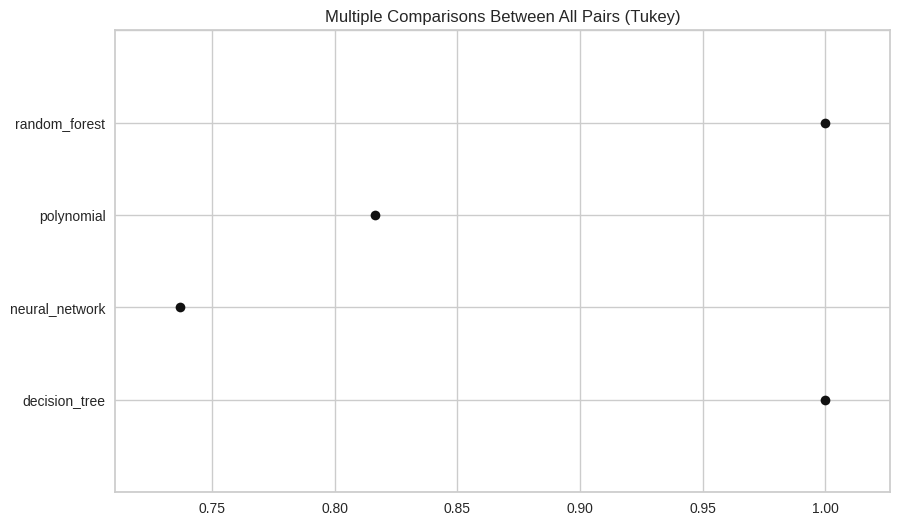

In [ ]:
statistical_test_60.plot_simultaneous();

**Hypothesis Testing with Kruskal-Wallis and Nemenyi post-hoc test (dados não normalizados)**

In [ ]:
# Conduct the Kruskal-Wallis Test
result_KW_test_60 = stats.kruskal(result_polynomial_60, result_decision_tree_60,
                                  result_random_forest_60, result_neural_network_60)
print (result_KW_test_60)

KruskalResult(statistic=201.67313969571228, pvalue=1.8349992749716806e-43)


<ipython-input-14-1237642eca31>:2: DeprecationWarning: Please use `kruskal` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  result_KW_test_60 = stats.kruskal(result_polynomial_60, result_decision_tree_60, result_random_forest_60, result_neural_network_60)


In [ ]:
# Conduct the Nemenyi post-hoc test
# Combine three groups into one array
!pip install scipy scikit-posthocs numpy
import scikit_posthocs as sp

In [ ]:
# Conduct the Nemenyi post-hoc test
data_Nemenyi_60 = np.array([result_polynomial_60, result_decision_tree_60,
                            result_random_forest_60, result_neural_network_60])
result_Nemenyi_test_60 = sp.posthoc_nemenyi_friedman(data_Nemenyi_60.T)
print (result_Nemenyi_test_60)

       0         1         2      3
0  1.000  0.001000  0.001000  0.001
1  0.001  1.000000  0.888247  0.001
2  0.001  0.888247  1.000000  0.001
3  0.001  0.001000  0.001000  1.000
